# 📊 Projeto de Comparação de Modelos de Regressão com Multicolinearidade

## 🎯 Objetivo
Avaliar o desempenho de diferentes técnicas de regressão aplicadas a um conjunto de dados que apresenta **multicolinearidade**, com o intuito de identificar o modelo que melhor se ajusta aos dados.

## 🧩 Etapas do Projeto

### 1. Exploração Inicial dos Dados
- Análise descritiva
- Identificação de multicolinearidade (ex: matriz de correlação, VIF)

### 2. Modelos a Serem Aplicados
- **Regressão Linear Múltipla**
  - Antes do tratamento da multicolinearidade
  - Após o tratamento (ex: remoção de variáveis, PCA)
- **Regressão Ridge**
- **Regressão Lasso**

### 3. Estratégia de Validação
- Divisão dos dados em **conjunto de treino e teste**
- Aplicação de **validação cruzada** (ex: K-Fold)

### 4. Avaliação de Desempenho
- Métricas de erro:
  - MAPE (Mean Absolute Percentage Error)
  - MSE (Mean Squared Error)
  - RMSE (Root Mean Squared Error)
  - MAE (Mean Absolute Error)
- Critérios de informação:
  - AIC (Akaike Information Criterion)
  - BIC (Bayesian Information Criterion)

## 🧠 Ferramentas e Tecnologias Sugeridas
- Linguagem: Python (bibliotecas como `scikit-learn`, `statsmodels`, `pandas`, `numpy`)
- Visualização: `matplotlib`, `seaborn`

## 📌 Resultados Esperados
- Comparativo entre os modelos com base nas métricas e critérios
- Discussão sobre o impacto da multicolinearidade
- Recomendação do modelo mais adequado para os dados analisados

In [2]:
# Manipulação de Dados
import pandas as pd
import numpy as np

# Visualização de Dados
import matplotlib.pyplot as plt
import seaborn as sns

# Análise de Regressão
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Regresão Rigde e Lasso
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,  mean_absolute_percentage_error

# Validação Cruzada
from sklearn.model_selection import KFold

# Seleção de Modelos
from sklearn.model_selection import GridSearchCV

# **(1) Leitura e Pré-processamente de Dados**

In [5]:
# Caminho do arquivo.XLSX
path = "https://github.com/MarioDhiego/Ridge_Regression/blob/main/dados_pinus.xlsx?raw=true" # "C:/Users/user/Documents/DETRAN/REGRESSÃO - DIEGO/DADOS.xlsx"

# Leitura do arquivo.XLSX
df = pd.read_excel(path)

# Informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   VOLUME      250 non-null    float64
 1   IDADE       250 non-null    float64
 2   DAP         250 non-null    float64
 3   ALTURA      250 non-null    float64
 4   IAF         250 non-null    float64
 5   DAF         250 non-null    float64
 6   GAP         250 non-null    float64
 7   AREA_BASAL  250 non-null    float64
dtypes: float64(8)
memory usage: 15.8 KB


In [6]:
# Primeiras Linhas
df.head()

VOLUME      IDADE        DAP     ALTURA       IAF       DAF       GAP  \
0   12.985249  12.076936  23.625612   9.388808  3.402145  1.837882  7.064905   
1   73.905368  10.558716  17.919589  13.203805  3.841673  1.845124  6.311597   
2  120.493795  10.339350  21.654487  17.949100  3.790026  2.175840  6.799161   
3   29.857978  11.539865  33.060965  14.485212  4.300795  1.406537  5.082424   
4   89.771460  12.162035  29.480292  17.794589  3.179624  1.829397  6.291837   

   AREA_BASAL  
0    0.043839  
1    0.025220  
2    0.036829  
3    0.085846  
4    0.068258

In [7]:
# Últimas Linhas
df.tail()

VOLUME      IDADE        DAP     ALTURA       IAF       DAF  \
245    0.181491  11.209062  33.009538  13.508520  4.565397  1.683747   
246  121.485683  13.063117  25.293437  17.074268  3.330794  2.188345   
247  101.767074  10.764773  30.322113  20.829481  4.043251  1.634424   
248   33.981156  12.456014  24.803353  11.650305  2.136116  1.569387   
249   20.710558  12.455731  32.244518  13.352239  2.770031  1.929505   

          GAP  AREA_BASAL  
245  5.271708    0.085579  
246  5.822479    0.050246  
247  5.825173    0.072212  
248  7.979903    0.048318  
249  7.980430    0.081659

# **(2) Análise Exploratória de Dados**

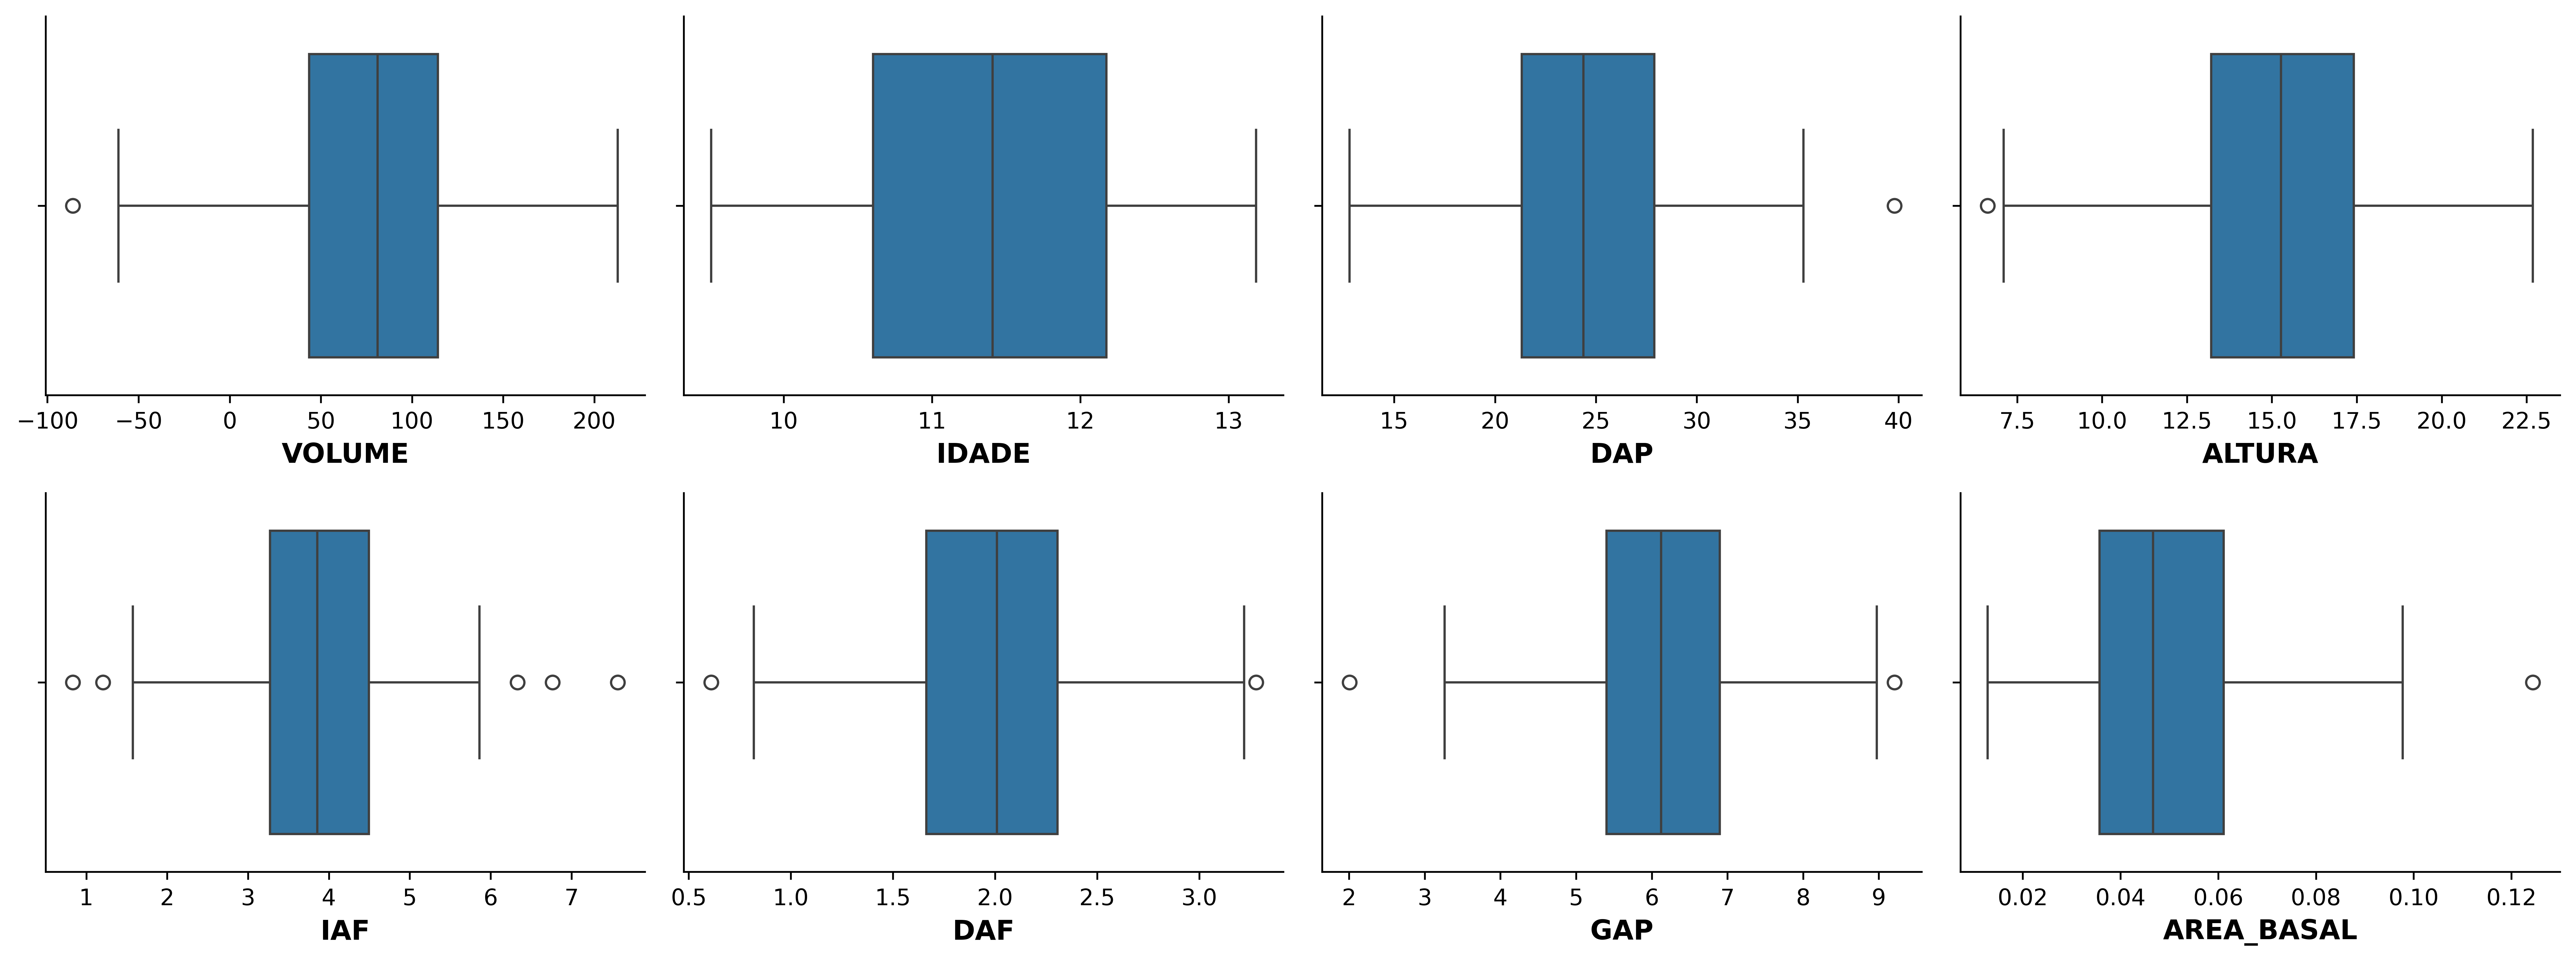

In [8]:
# Configurações de Figura
fig, axes = plt.subplots(2, 4, figsize=(16, 6), dpi=600)

# Iteração de Construção Gráfica
for column, ax in zip(df.columns, axes.flatten()):
  # Boxplot
  sns.boxplot(x=column, data=df, ax=ax)

  # Configurações de eixos
  ax.set_xlabel(column, fontsize=12, weight="bold")

  # Outras configurações
  ax.spines["top"].set_visible(False)
  ax.spines["right"].set_visible(False)

# Ajuste do Layout e Exibição da Figura
fig.tight_layout()
plt.show()

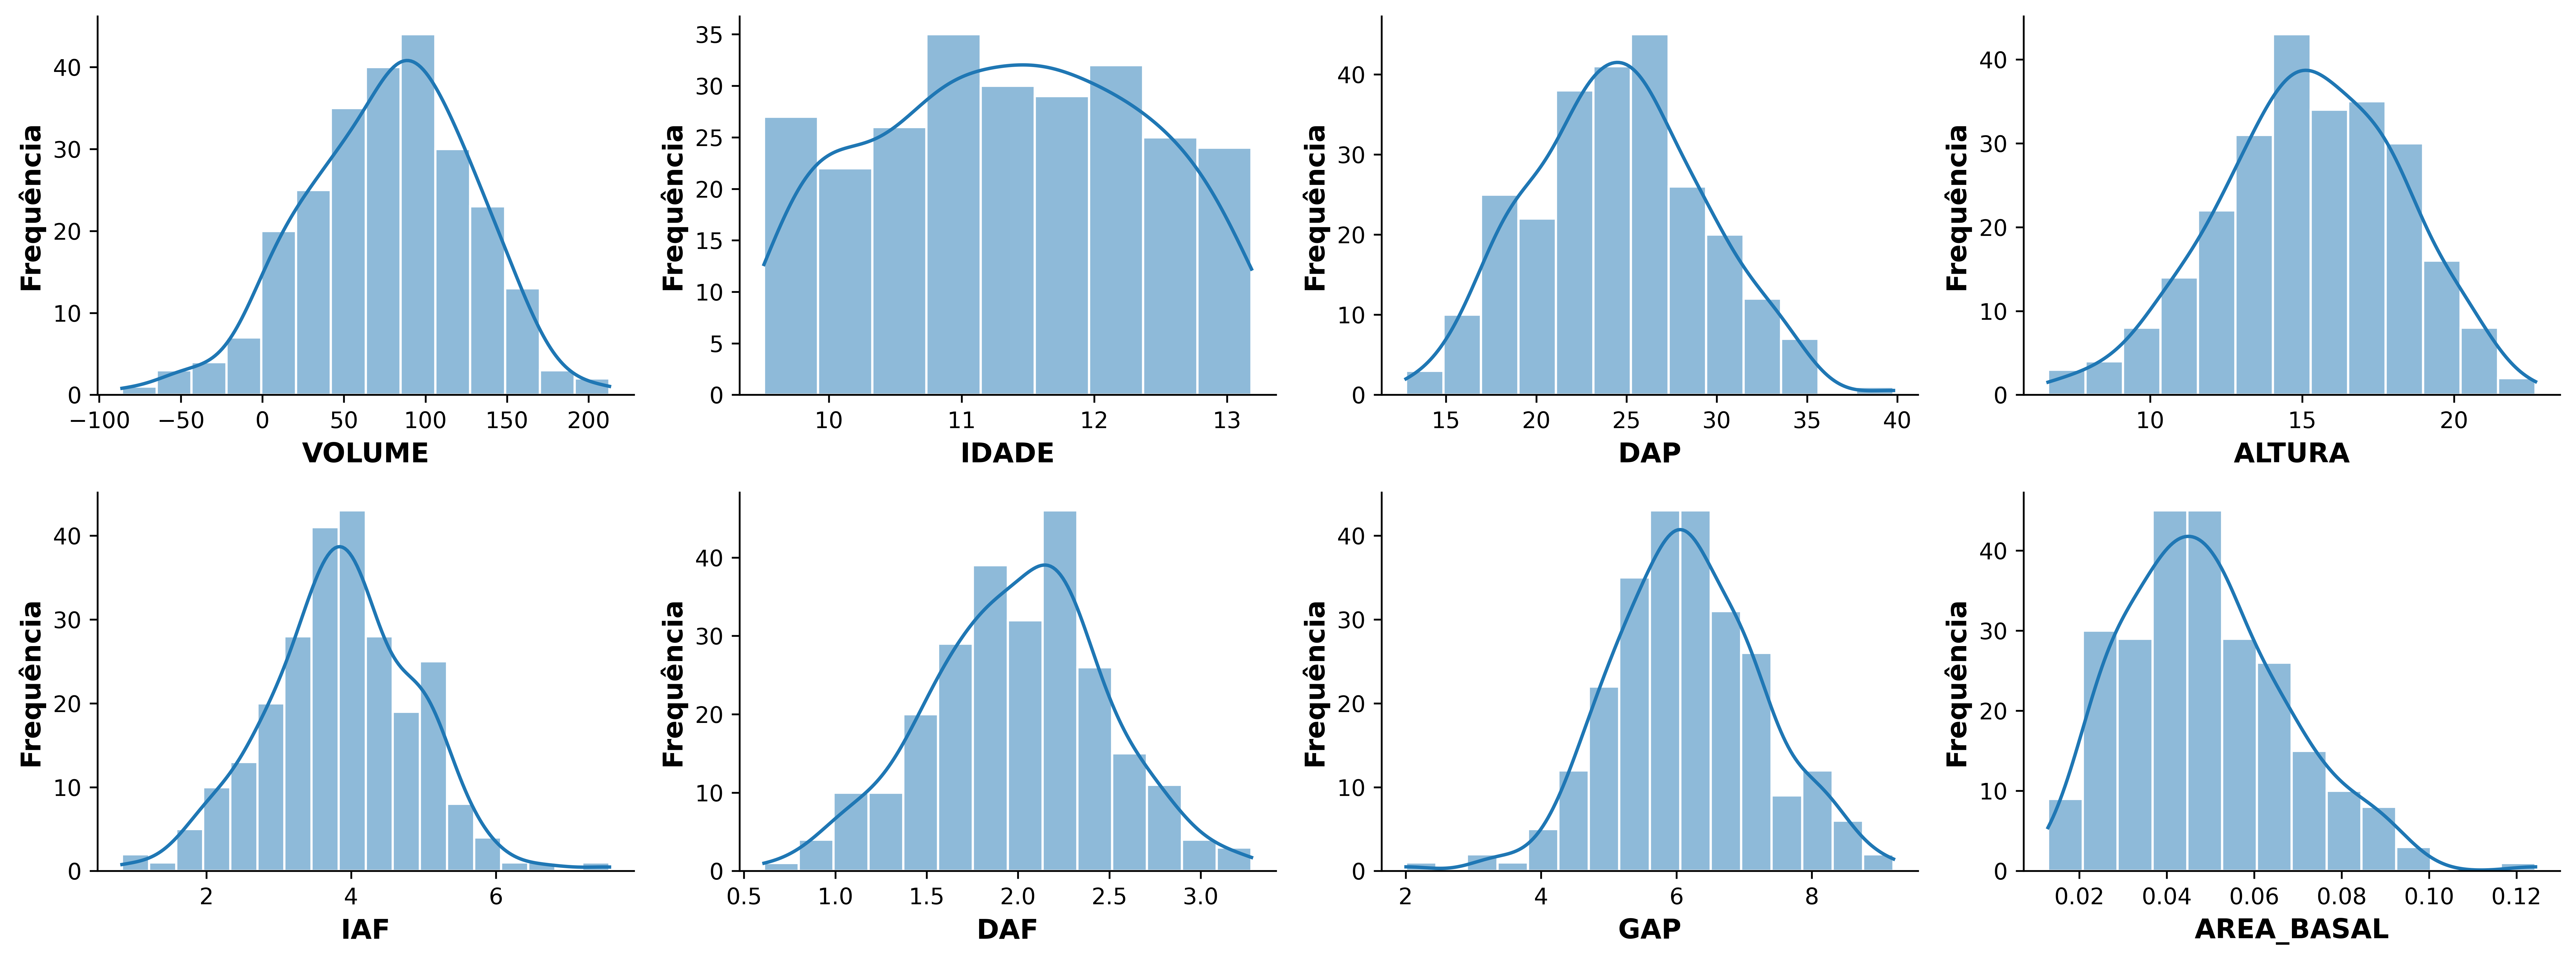

In [9]:
# Configurações de Figura
fig, axes = plt.subplots(2, 4, figsize=(16, 6), dpi=600)

# Iteração de Construção Gráfica
for column, ax in zip(df.columns, axes.flatten()):
  # Histograma & Estimação da Densidade
  sns.histplot(x=column, data=df, edgecolor="white", kde=True, line_kws={"color": "red"}, ax=ax)

  # Configurações de eixos
  ax.set_xlabel(column, fontsize=12, weight="bold")
  ax.set_ylabel("Frequência", fontsize=12, weight="bold")

  # Outras configurações
  ax.spines["top"].set_visible(False)
  ax.spines["right"].set_visible(False)

# Ajuste do Layout e Exibição da Figura
fig.tight_layout()
plt.show()

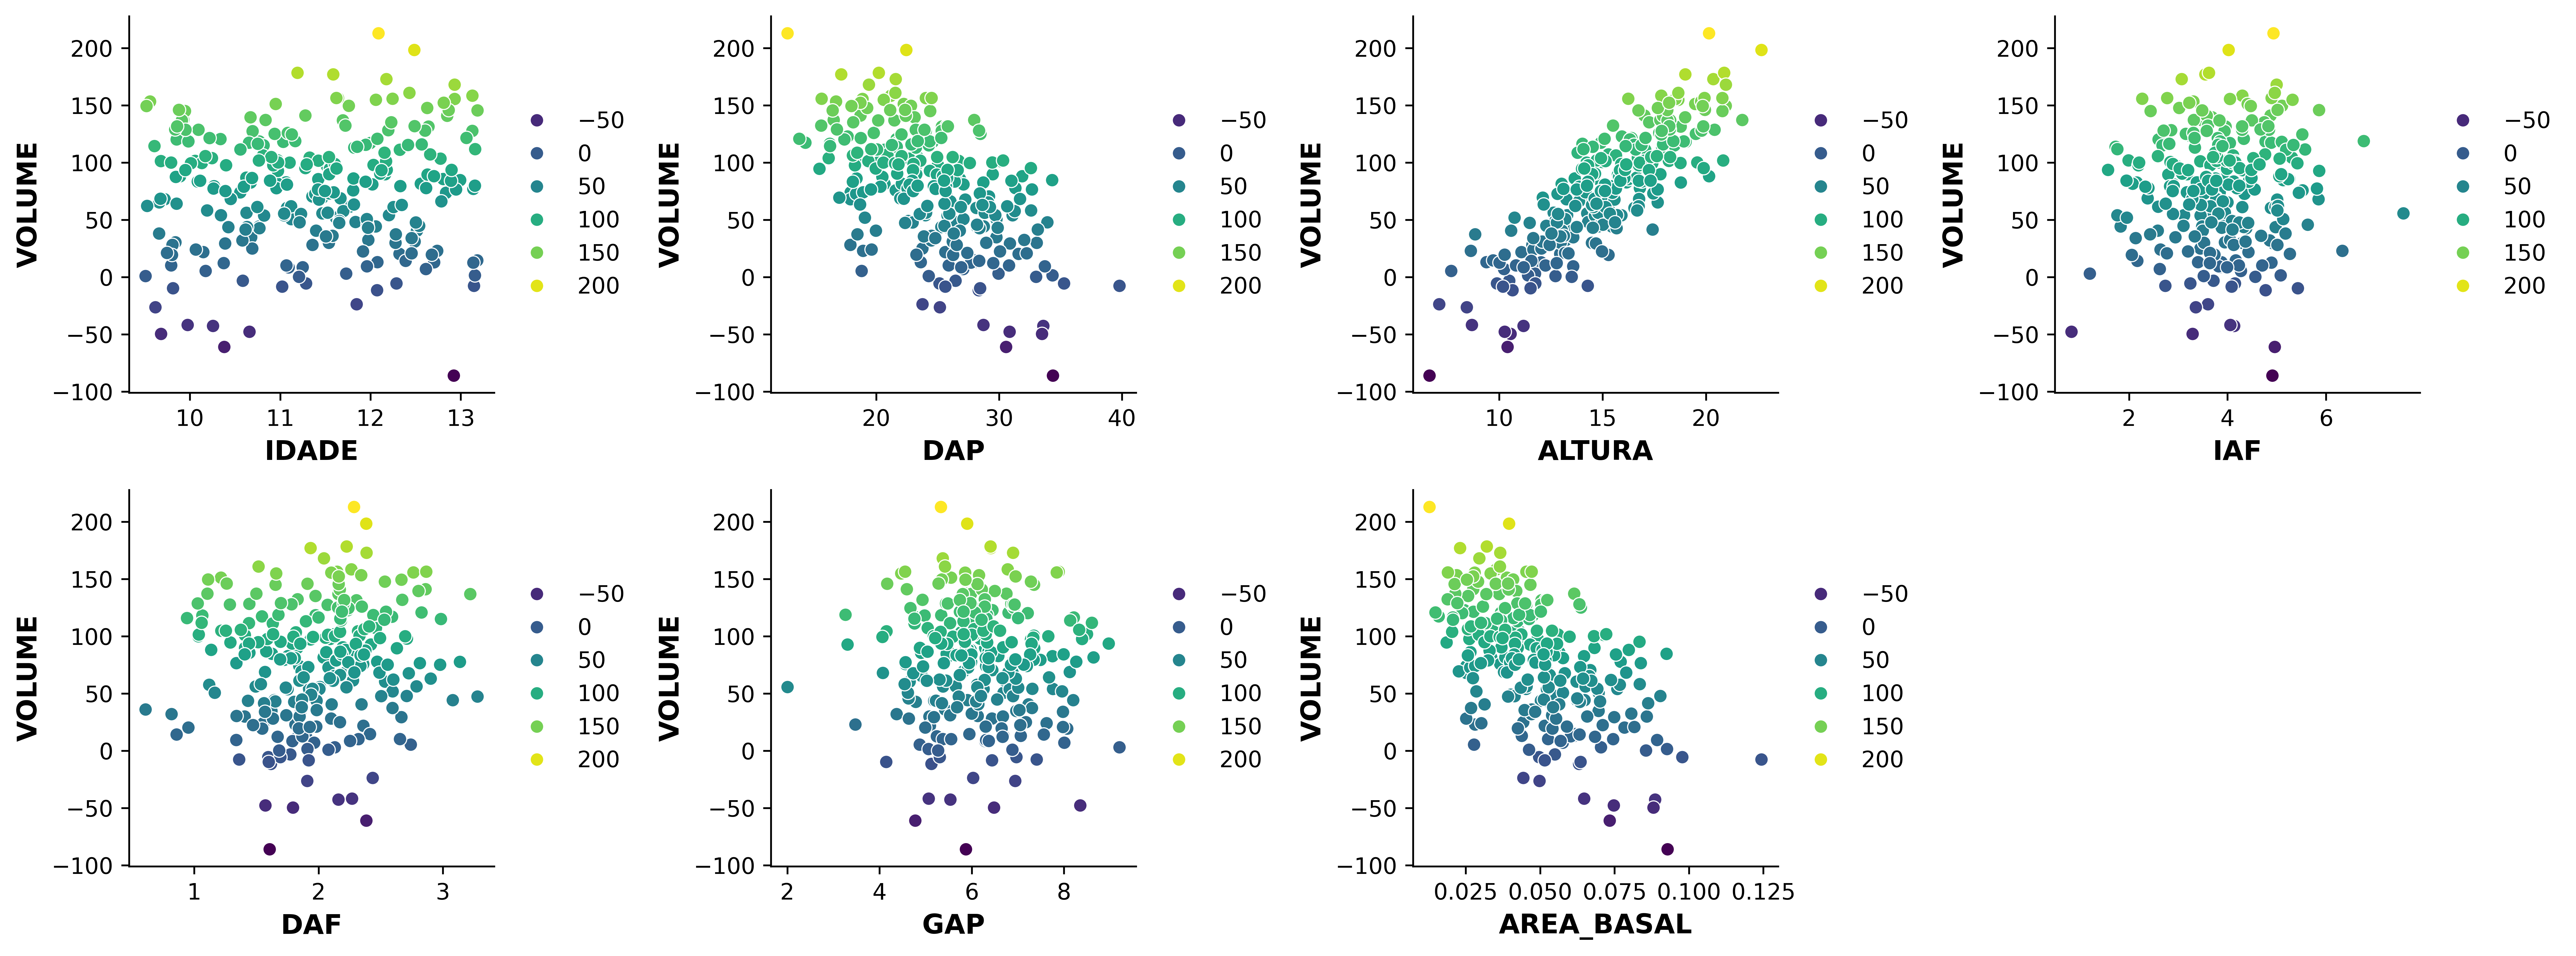

In [10]:
# Configurações de Figura
fig, axes = plt.subplots(2, 4, figsize=(16, 6), dpi=600)

# Iteração de Construção Gráfica
for column, ax in zip(df.drop(columns="VOLUME").columns, axes.flatten()):
  # Scatterplot
  sns.scatterplot(x=column, y="VOLUME", data=df, hue="VOLUME", palette="viridis", ax=ax)

  # Configurações de eixos
  ax.set_xlabel(column, fontsize=12, weight="bold")
  ax.set_ylabel("VOLUME", fontsize=12, weight="bold")

  # Configurações de Legenda
  ax.legend(prop={"size":10}, loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)

  # Outras configurações
  ax.spines["top"].set_visible(False)
  ax.spines["right"].set_visible(False)

# Remover subplots vazios
fig.delaxes(axes.flat[-1])

# Ajuste do Layout e Exibição da Figura
fig.tight_layout()
plt.show()

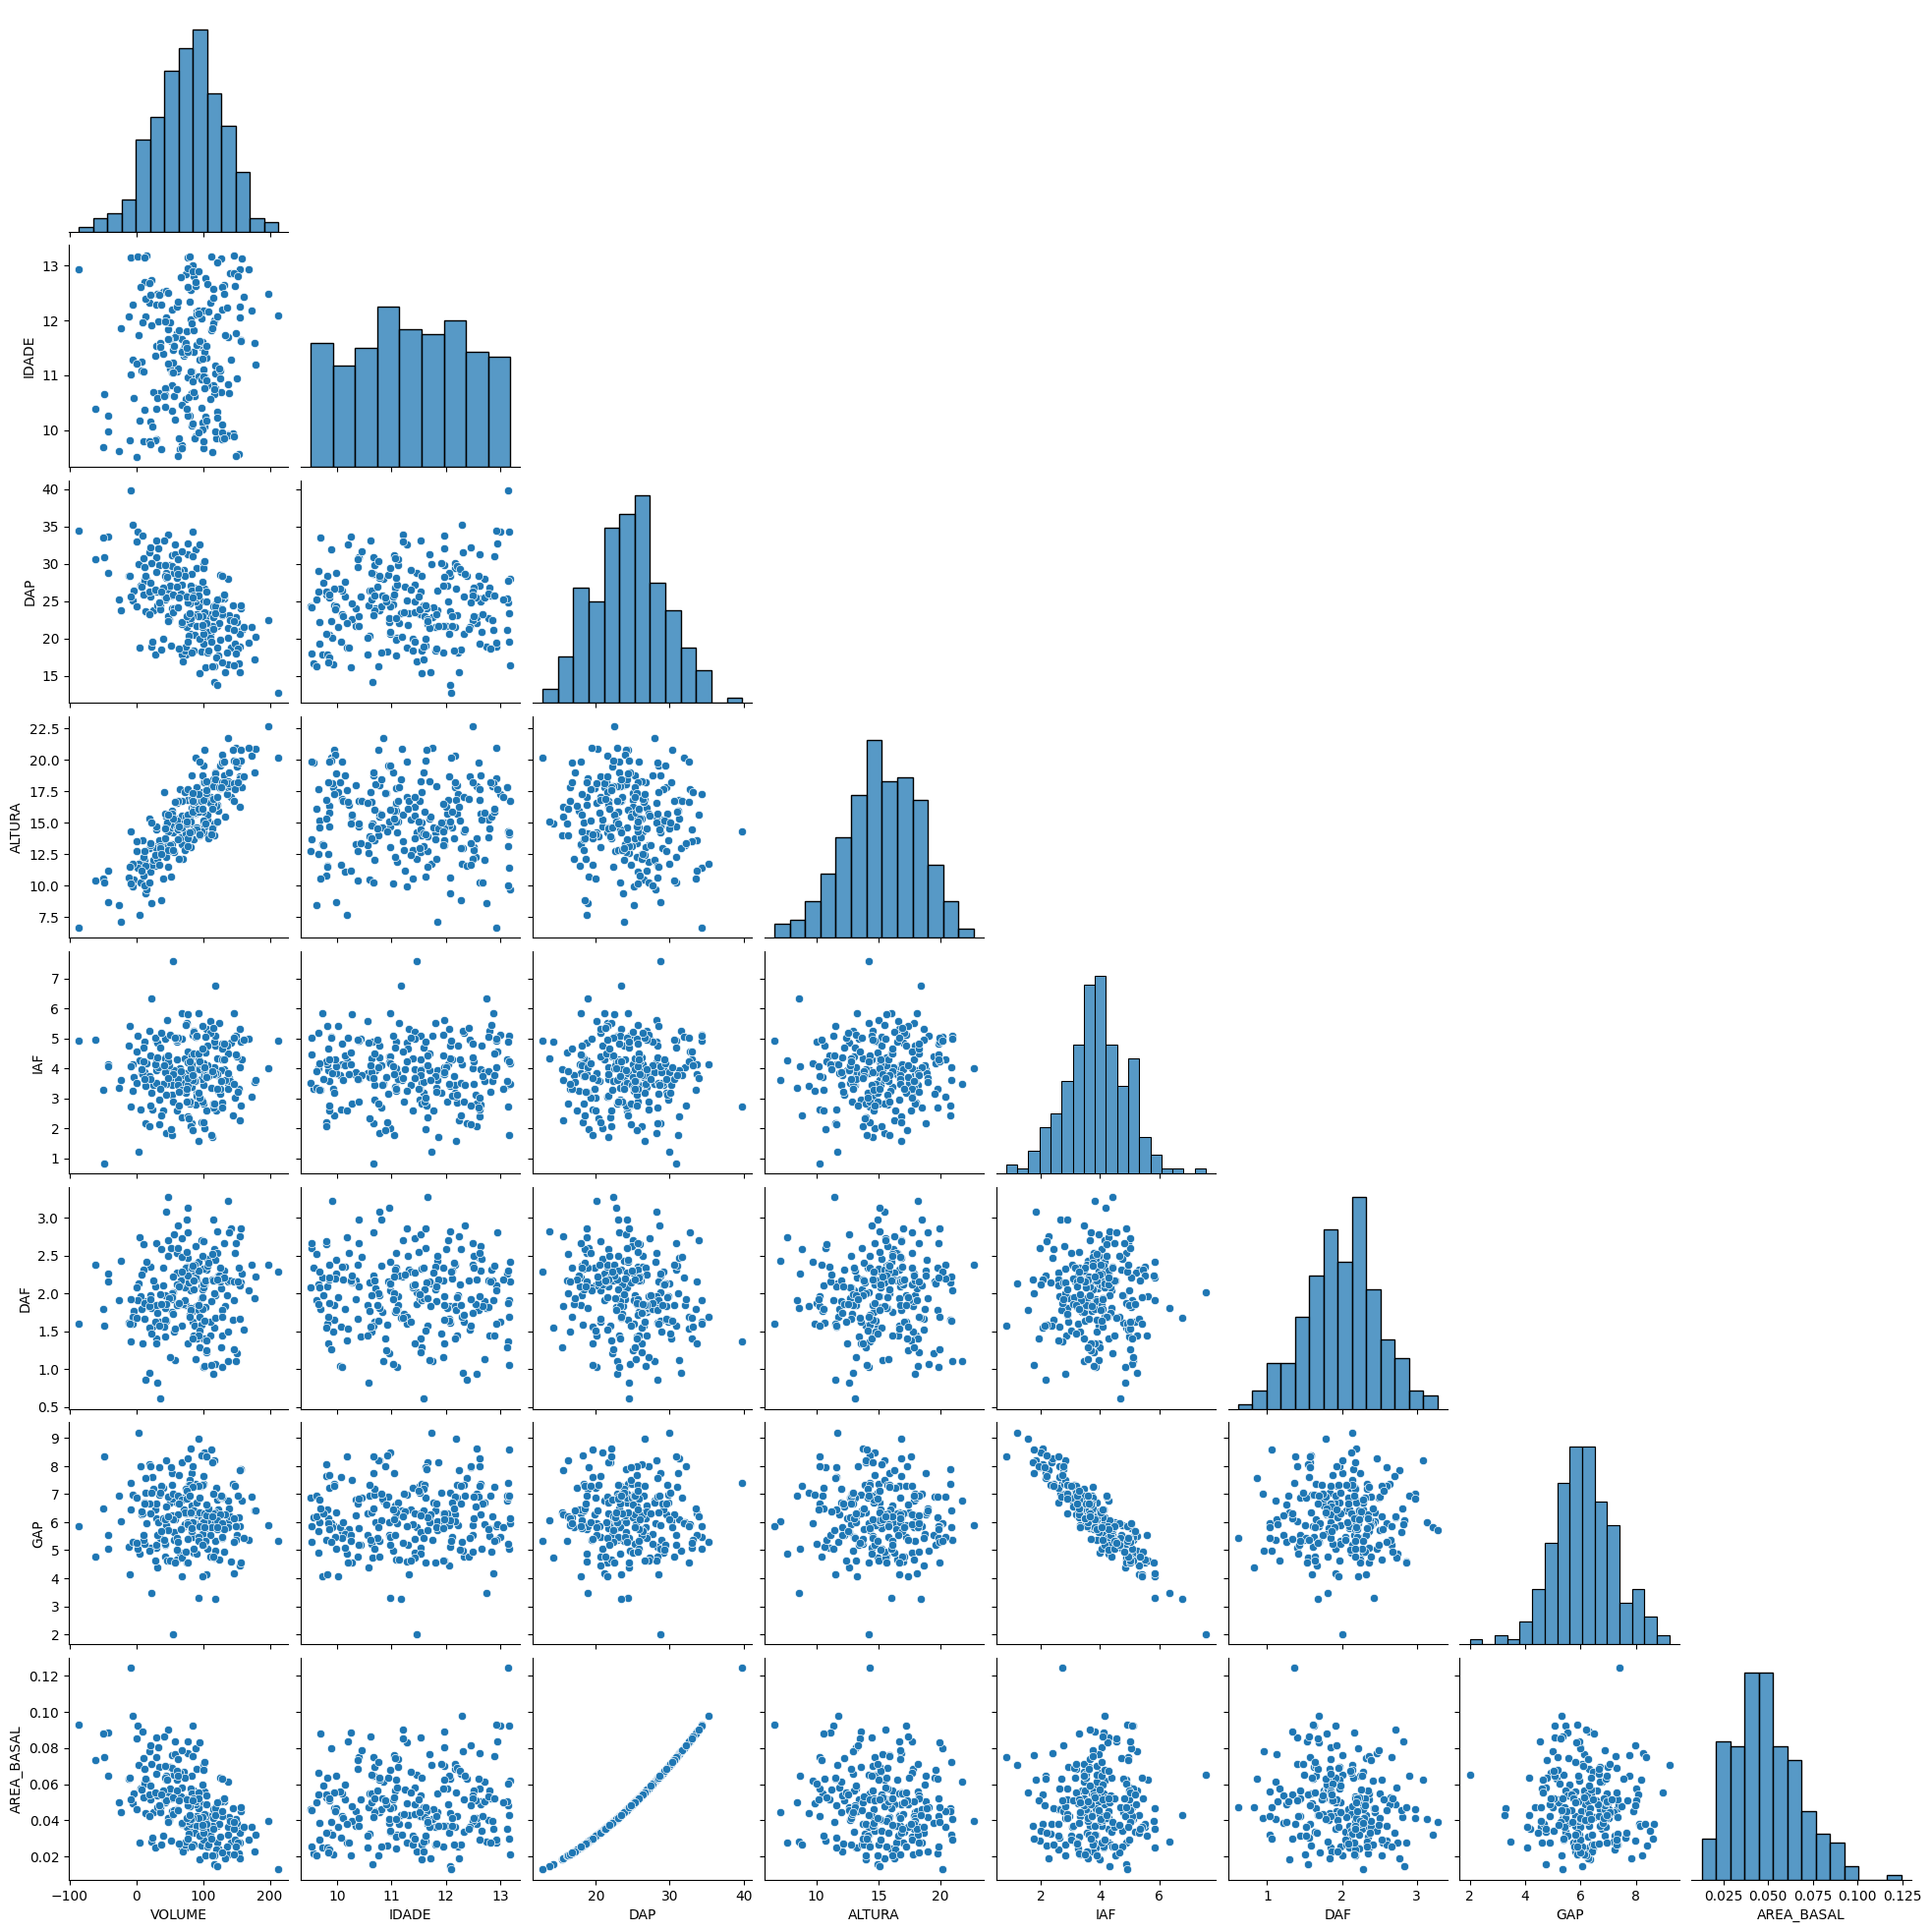

In [11]:
# Criar Pairplot
sns.pairplot(df, corner=True)

# Exibição da Figura
plt.show()

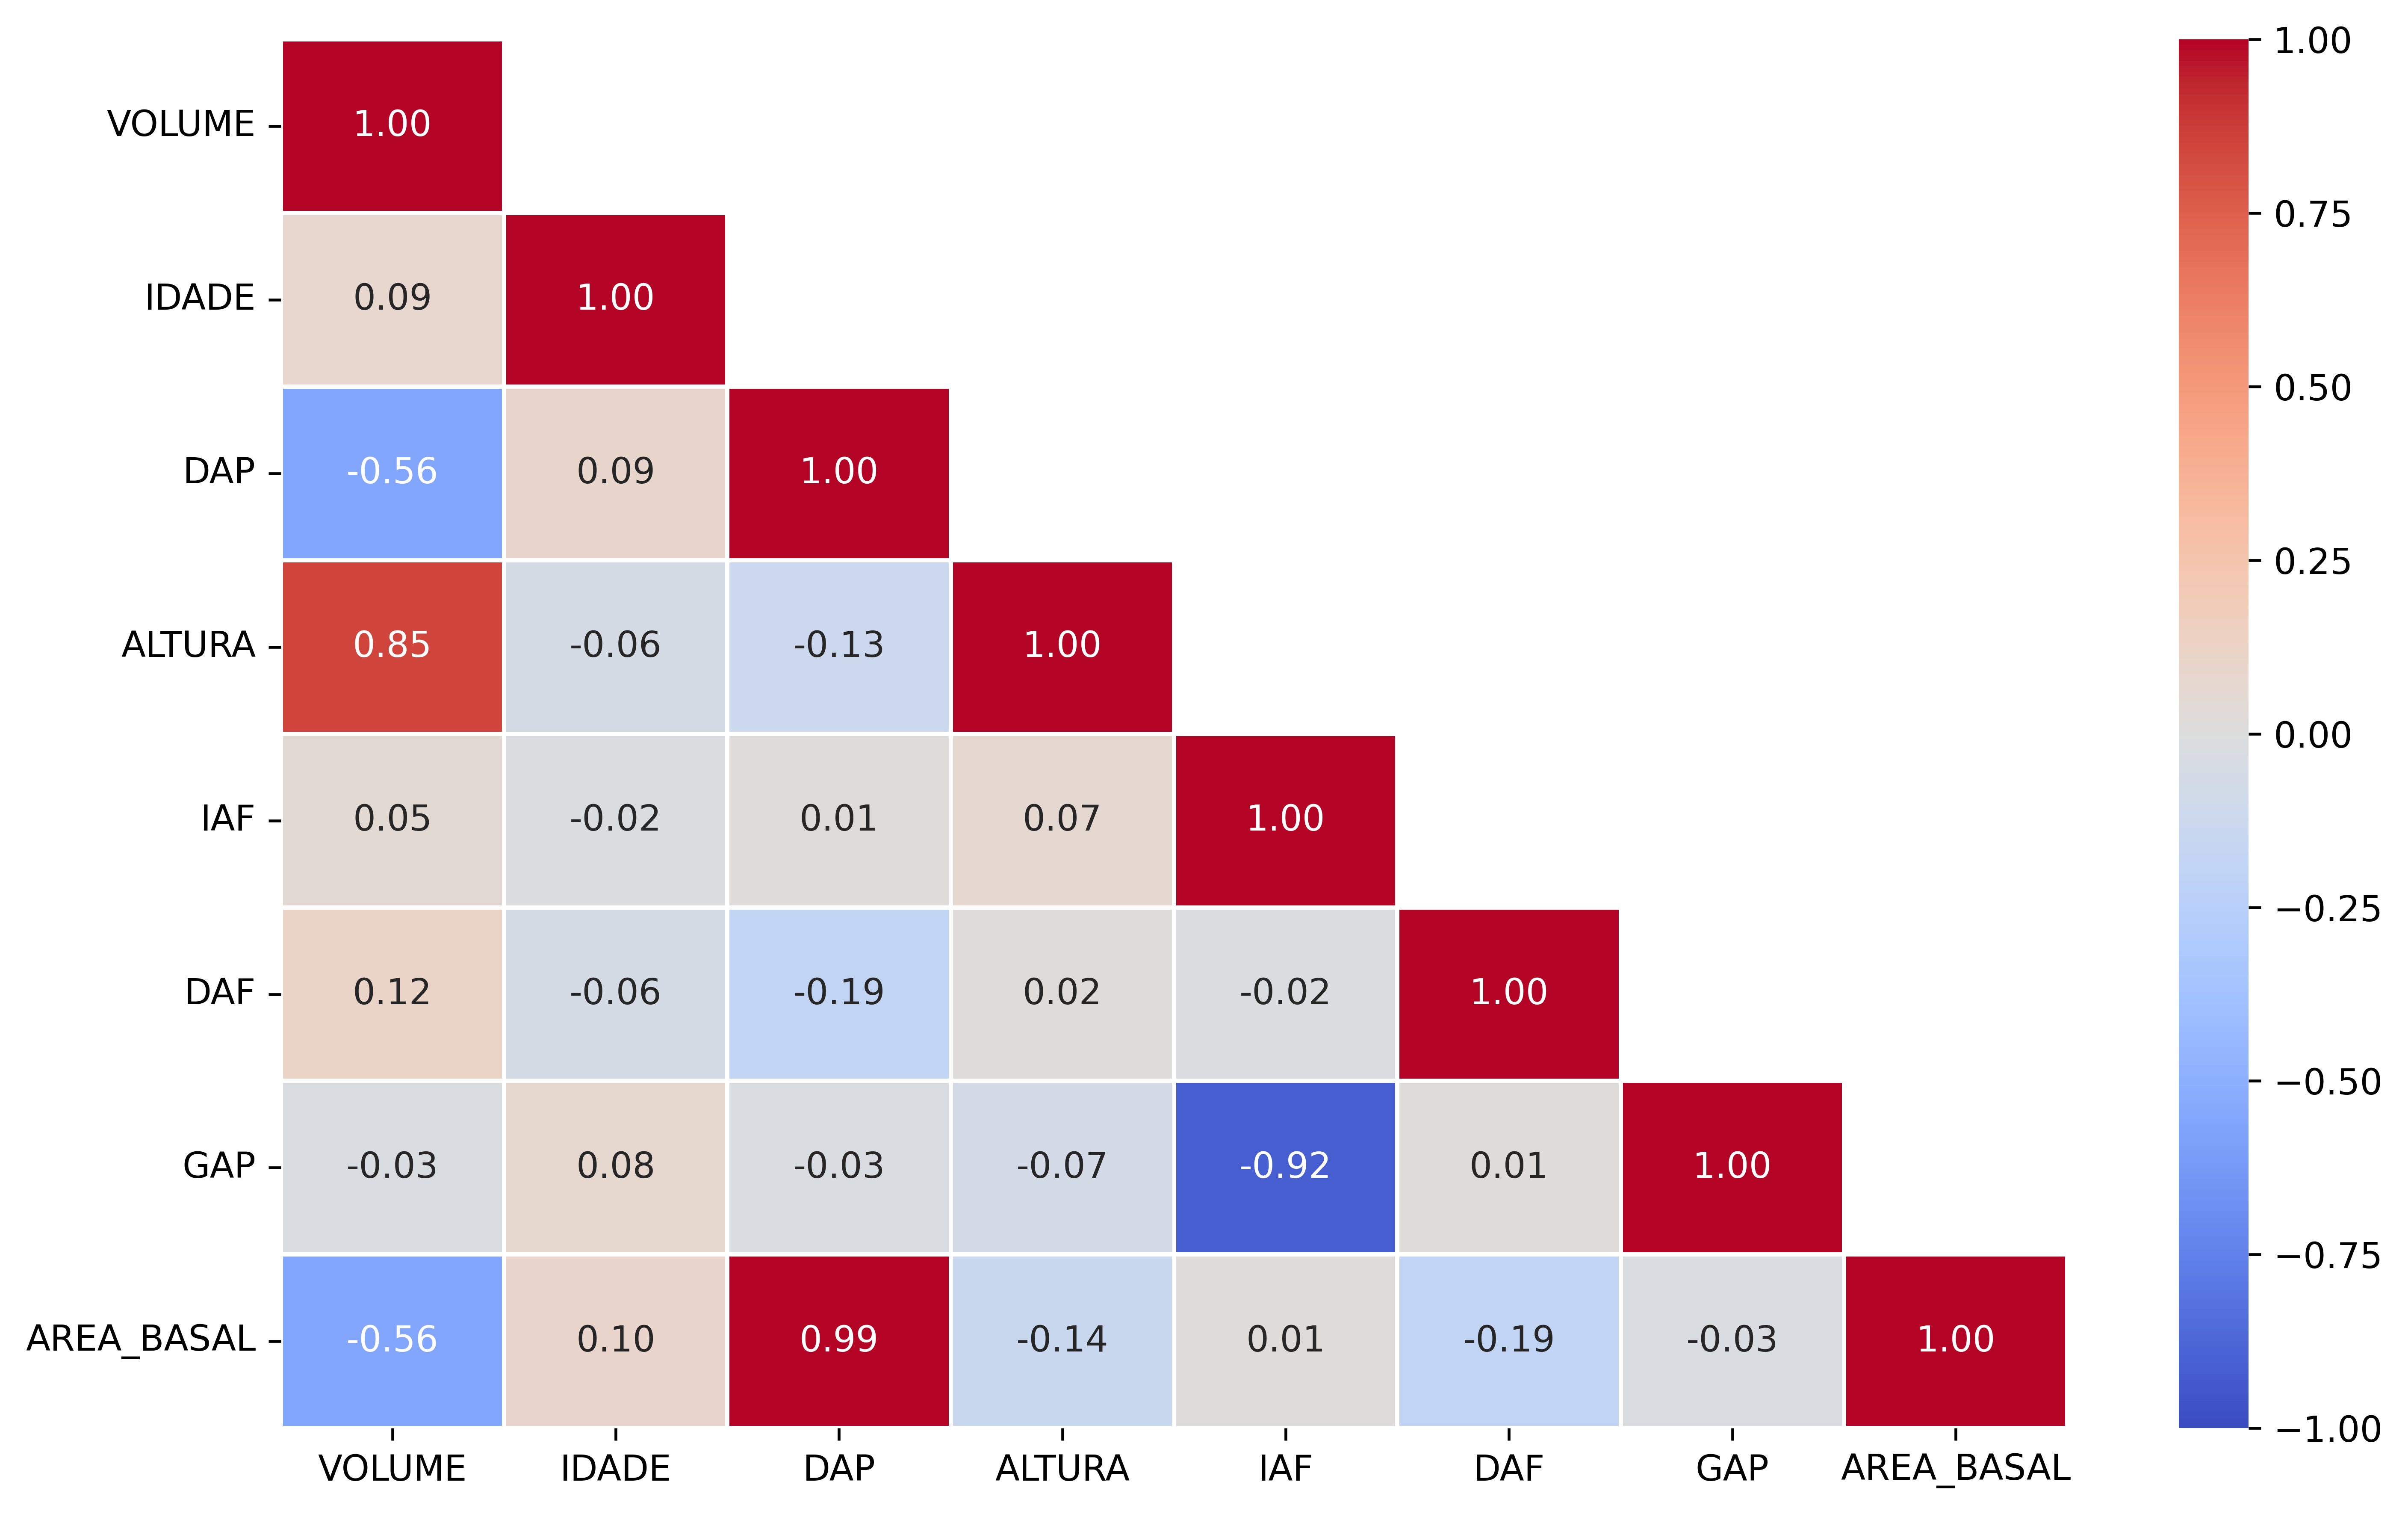

In [12]:
# Matrix de Correlação
corr = df.corr(method="pearson")

# Criar uma máscara para a parte triangular superior (mantendo a diagonal principal)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)

# Configurações de Figura
fig, ax = plt.subplots(figsize=(10, 6), dpi=600)

# Mapa de Calor com máscara
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1
            , vmin=-1, center=0, vmax=1, ax=ax, mask=mask)

# Ajuste do layout e Exibição da Figura
fig.tight_layout()
plt.show()

## **(2.2) Análise de Correlação**

* Cálculo do Coeficiente de Correlação Linear de Pearson ($\widehat{\rho}$).
* Teste $t$ para *Significância* de $\widehat{\rho}$.

    * Hipóteses:
      $$
      \begin{cases}
      H_{0}: \text{ Não há correlação significativa, } \rho = 0 \\
      H_{1}: \text{ Há correlação significativa, } \rho \neq 0
      \end{cases}
      $$
        
    * Estatística de Teste:
      $$
      t = \dfrac{ \widehat{\rho} (n - 2)}{\sqrt{1 - \widehat{\rho}^2}} \quad \sim \quad t_{n - 2}
      $$

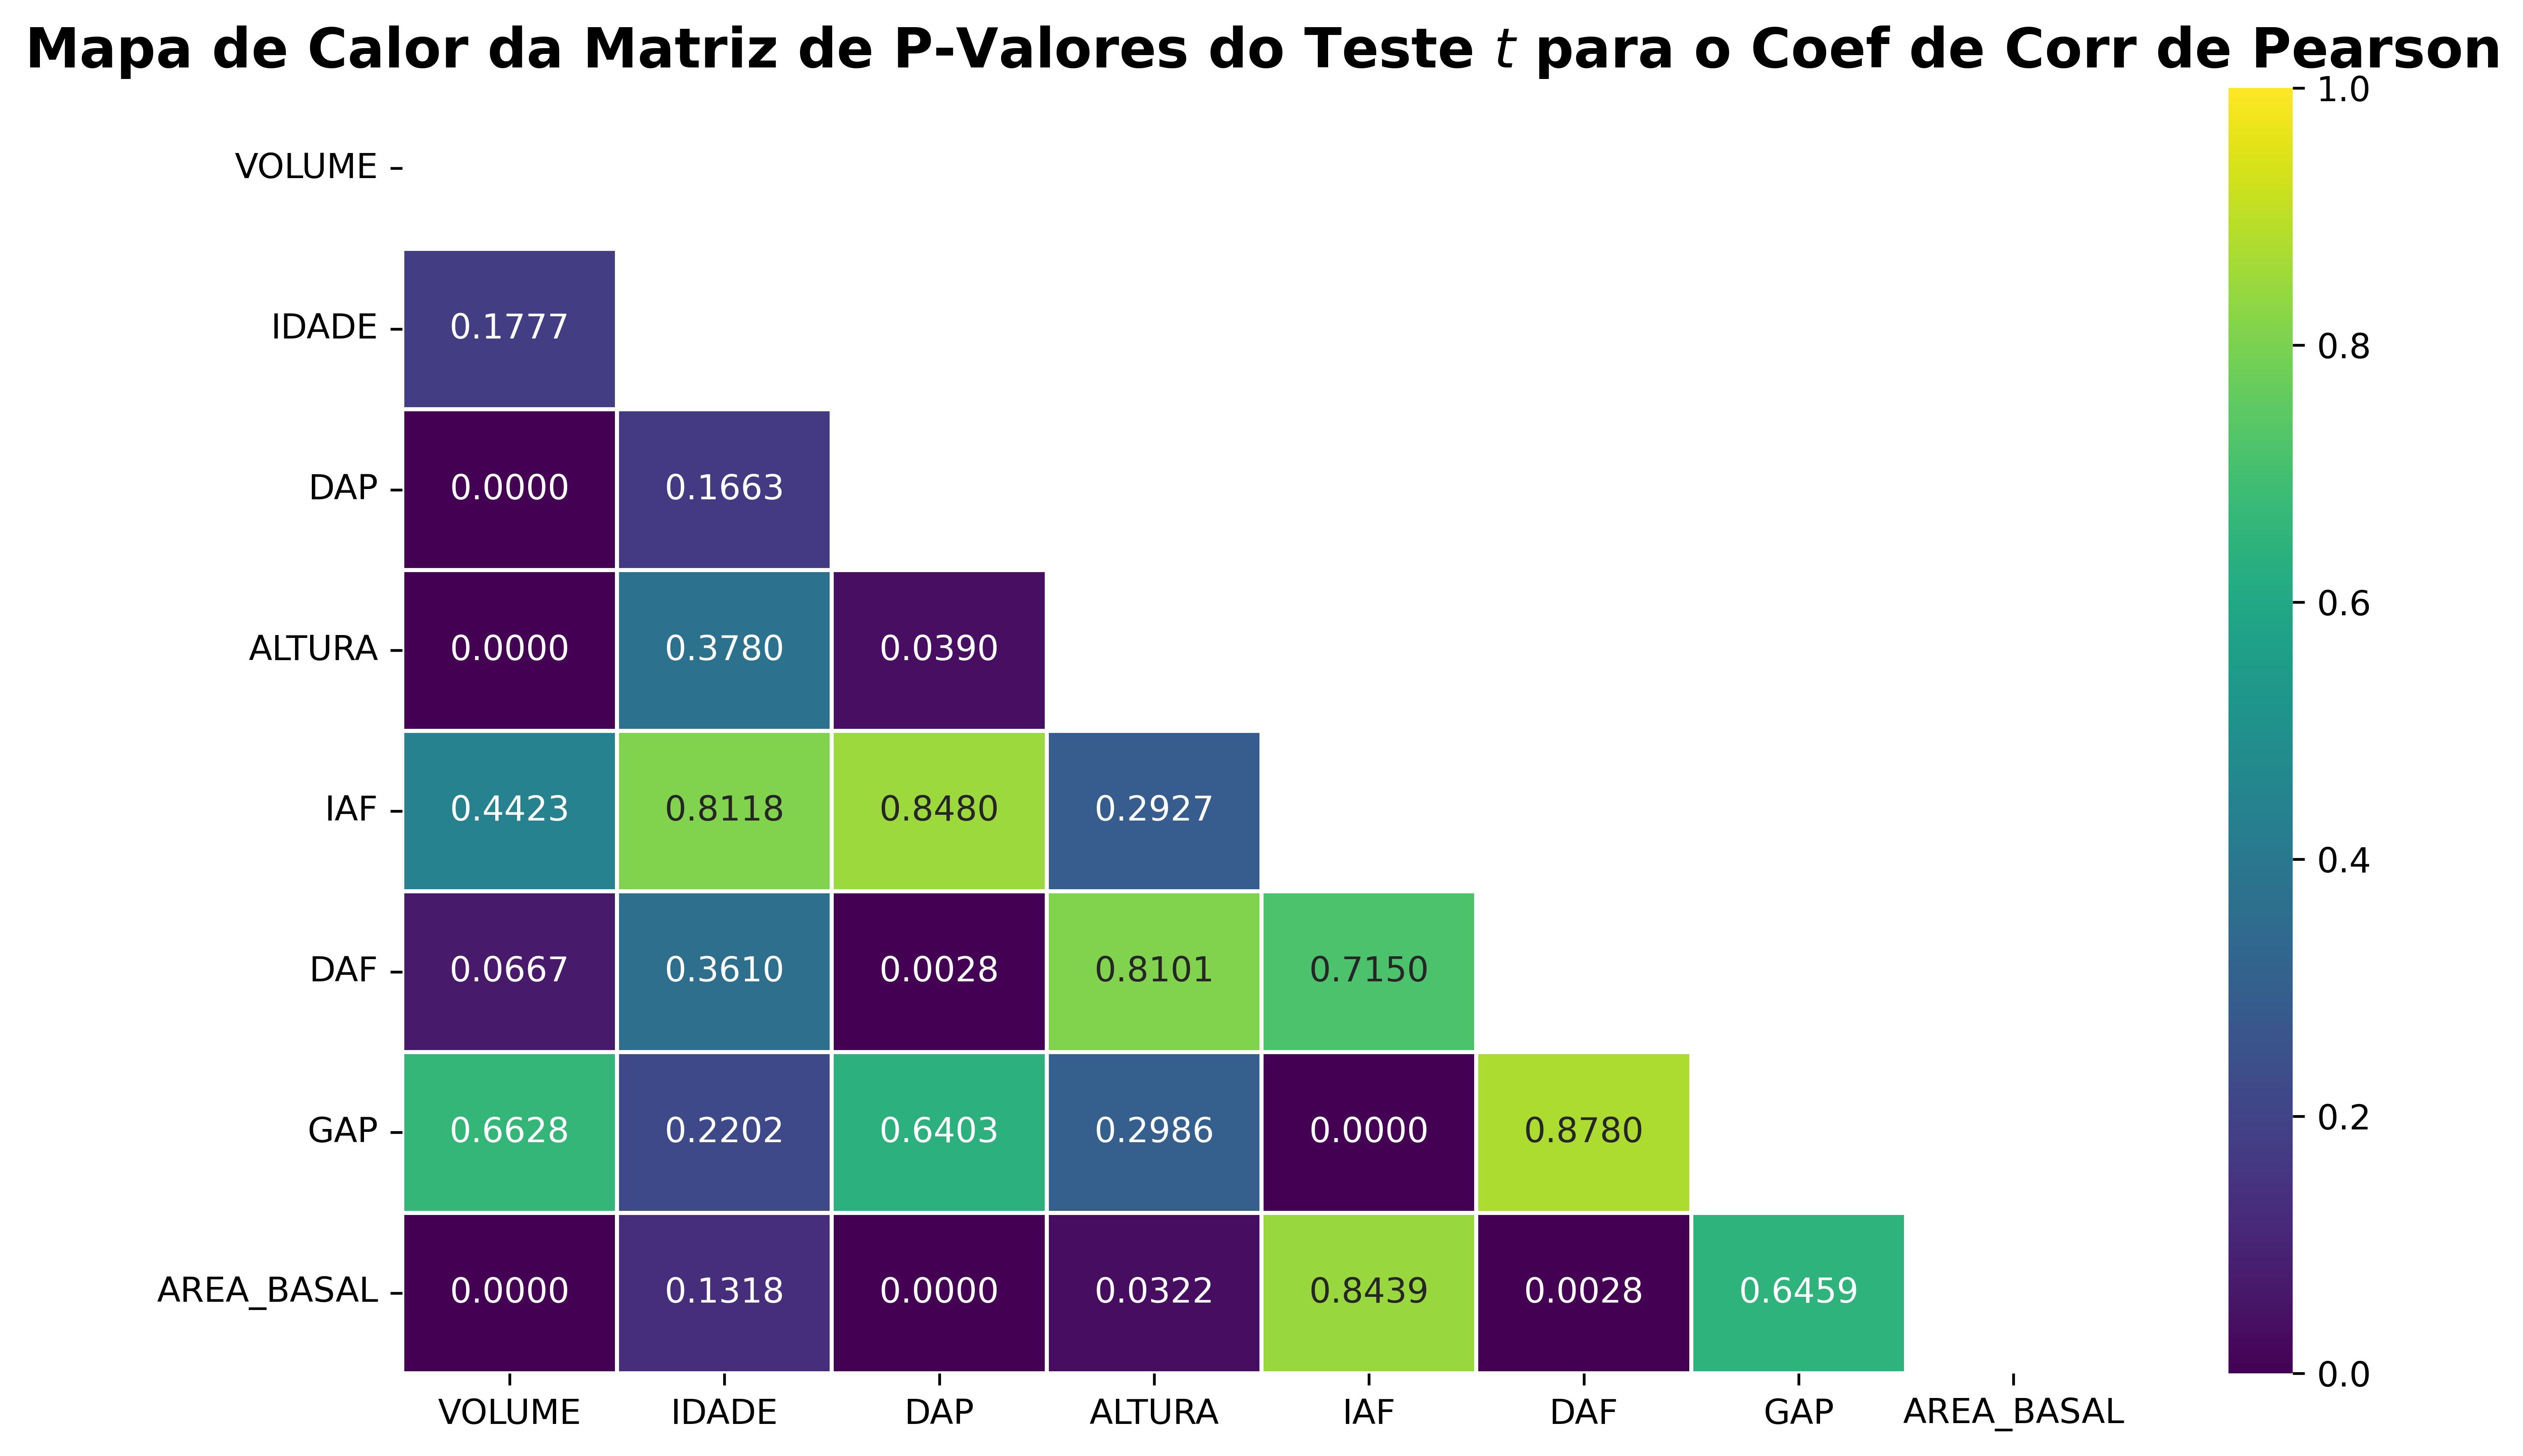

In [13]:
from scipy.stats import pearsonr

# Número de variáveis
n_var = df.shape[1]

# Matriz de Resultados
r_matrix = np.zeros(shape=(n_var, n_var))

# Aplicar o Teste t para o Coeficiente Linear de Pearson
for i in range(n_var):
    for j in range(n_var):
        # Seleção de Variáveis
        var1, var2 = df.columns[i],  df.columns[j]

        # Probabilidade de Significância do Teste
        coef, p_value = pearsonr(df[var1], df[var2])

        # Armazenamento de Dados
        r_matrix[i, j] = p_value

# Formatação dos Resultados
r_matrix = pd.DataFrame(r_matrix, columns=df.columns, index=df.columns)

# Criar uma máscara para a parte triangular superior (mantendo a diagonal principal)
mask = np.triu(np.ones_like(r_matrix, dtype=bool))

# Configurações de Figura
fig, ax = plt.subplots(figsize=(10, 6), dpi=600)

# Mapa de Calor com máscara
sns.heatmap(r_matrix, annot=True, cmap="viridis", fmt=".4f", linewidths=1, vmin=0, vmax=1, mask=mask, ax=ax)

# Título
ax.set_title("Mapa de Calor da Matriz de P-Valores do Teste $t$ para o Coef de Corr de Pearson", fontsize=16, weight="bold")

# Ajuste do layout e Exibição da Figura
fig.tight_layout()
plt.show()

## **(2.1) Fator de Inflação de Variância (VIF)**

O Fator de Inflação de Variância (VIF) é uma medida estatística utilizada para avaliar o grau de multicolinearidade em um modelo de regressão múltipla. Multicolinearidade ocorre quando duas ou mais variáveis independentes em um modelo estão altamente correlacionadas, o que pode levar a estimativas de coeficientes instáveis e erros padrão inflados. Um VIF alto indica que a variável preditora está fortemente correlacionada com outras variáveis independentes no modelo, o que pode afetar a interpretação e a precisão do modelo.

* Interpretação dos valores de VIF:

    1. $VIF = 1$: Não há multicolinearidade. A variável preditora não está correlacionada com outras variáveis independentes no modelo.
    2. $VIF \leq 5$: Há multicolinearidade moderada. A correlação entre a variável e outras variáveis independentes é observada, mas não é considerada crítica.
    3. $VIF > 5$: Há multicolinearidade alta. A correlação entre a variável e outras variáveis independentes é alta, o que pode levar a problemas na interpretação e precisão do modelo.
    4. $VIF > 10$: Há multicolinearidade grave. A correlação entre a variável e outras variáveis independentes é muito alta, o que pode levar a resultados pouco confiáveis do modelo.

In [14]:
# Matriz Design
X = df.drop(columns="VOLUME")

# Adicionando o Intercpto
X = sm.add_constant(X)

# Calcular o Fator de Inflação de Variação (VIF)
VIF = pd.DataFrame(index=pd.Series(X.columns, name="Features"))
VIF["VIF"] = [variance_inflation_factor(X.values, id) for id in range(X.shape[1])]

# Excluindo o Intercpto da Visualização
VIF.drop(index="const", inplace=True)

# Visualizar
VIF

VIF
Features             
IDADE        1.044845
DAP         65.625225
ALTURA       1.026564
IAF          6.652028
DAF          1.040344
GAP          6.694949
AREA_BASAL  65.782421

## **(2.3) Decisão**

In [15]:
# Combinando Informações
decision = pd.DataFrame({"VIF": VIF.values.flatten(), "P>|t|": r_matrix.drop(index="VOLUME")["VOLUME"].values}, index=VIF.index)

# Visualizar
decision.round(2)

VIF  P>|t|
Features                
IDADE        1.04   0.18
DAP         65.63   0.00
ALTURA       1.03   0.00
IAF          6.65   0.44
DAF          1.04   0.07
GAP          6.69   0.66
AREA_BASAL  65.78   0.00

* **Resultados:**
    1. **à Variável `IDADE`:** A variável `IDADE` apresentou $VIF \approx 1,04$ (não preocupante), porém a correlação entre a `IDADE` e o `VOLUME` (variável resposta) foi não significativa ($\alpha = 0.05$). Logo, será convidada a se retirar do modelo.
    2. **à Variável `DAP`:** A variável `DAP` apresentou $VIF \approx 65,63$ (bastante preocupante) e a correlação entre a `DAP` e o `VOLUME` (variável resposta) foi significativa ($\alpha = 0.05$).
    3. **à Variável `ALTURA`:** A variável `ALTURA` apresentou $VIF \approx 1,03$ (não preocupante) e a correlação entre a `ALTURA` e o `VOLUME` (variável resposta) foi significativa ($\alpha = 0.05$).
    4. **à Variável `IAF`:** A variável `IAF` apresentou $VIF \approx 6,65$ (pouco preocupante), porém a correlação entre a `IAF` e o `VOLUME` (variável resposta) não foi significativa ($\alpha = 0.05$).
    5. **à Variável `DAF`:** A variável `DAF` apresentou $VIF \approx 1,04$ (pouco preocupante), porém a correlação entre a `DAF` e o `VOLUME` (variável resposta) não foi significativa ($\alpha = 0.05$). Logo, será convidada a se retirar do modelo.
    6. **à Variável `GAP`:** A variável `GAP` apresentou $VIF \approx 6,69$ (pouco preocupante), porém a correlação entre a `GAP` e o `VOLUME` (variável resposta) não foi significativa ($\alpha = 0.05$).
    7. **à Variável `AREA_BASAL`:** A variável `AREA_BASAL` apresentou $VIF \approx 65,78$ (batsante preocupante), porém a correlação entre a `AREA_BASAL` e o `VOLUME` (variável resposta) não foi significativa ($\alpha = 0.05$).

* **Conclusão:** Após a análise exploratória chegou-se há algumas conclusões. Foi provado que as variáveis `IDADE`, `IAF`, `DAF` e `GAP` apresentaram correlação não significativa, ao nível de $5\%$. Foi visto que `DAP` e `AREA_BASAL` têm alta correlação entre si fazendo com que ambas tenham um enorme $VIF$, o que afeta as estimativas obtidas pelo modelo. Porém, a literatura (da área) diz que não existe `VOLUME` sem `DAP`, o que desta forma, nos leva a retirar a variável `AREA_BASAL`.

In [16]:
# Variáveis que deixaram de compor o modelo
drop_features = ["IDADE", "IAF", "DAF", "GAP", "AREA_BASAL"]

# Exclusão de variáveis
df_copy = df.drop(columns=drop_features)

In [17]:
# Número de variáveis
n_var = df_copy.shape[1]

# Matriz de Resultados (p-valor)
r_matrix = np.zeros(shape=(n_var, n_var))

# Aplicar o Teste t para o Coeficiente Linear de Pearson
for i in range(n_var):
    for j in range(n_var):
        # Seleção de Variáveis
        var1, var2 = df_copy.columns[i],  df_copy.columns[j]

        # Probabilidade de Significância do Teste
        coef, p_value = pearsonr(df_copy[var1], df_copy[var2])

        # Armazenamento de Dados
        r_matrix[i, j] = p_value

# Formatação dos Resultados
r_matrix = pd.DataFrame(r_matrix, columns=df_copy.columns, index=df_copy.columns)

# Nova Matriz Design
X = df_copy.drop(columns="VOLUME")

# Adicionando o Intercpto
X = sm.add_constant(X)

# Calcular o Fator de Inflação de Variação (VIF)
VIF = pd.DataFrame(index=pd.Series(X.columns, name="Features"))
VIF["VIF"] = [variance_inflation_factor(X.values, id) for id in range(X.shape[1])]

# Excluindo o Intercpto da Visualização
VIF.drop(index="const", inplace=True)

# Combinando Informações
decision = pd.DataFrame({"VIF": VIF.values.flatten(), "P>|t|": r_matrix.drop(index="VOLUME")["VOLUME"].values}, index=VIF.index)

# Visualizar
decision

VIF         P>|t|
Features                        
DAP       1.017361  3.151313e-22
ALTURA    1.017361  7.789204e-71

In [69]:
# Variável Resposta
y = df_copy["VOLUME"]

# Definindo algumas variáveis
n = len(y)                           # Tamanho da amostra
p = X.drop(columns="const").shape[1] # Números de Preditores
k = p + 1                            # Número de Coeficientes

# **(3) Modelagem**

## **(3.1) Regressão Linear Múltipla**

In [70]:
# Análise Individual - Teste t
def individual_analysis(
        model: sm.OLS,
        alpha: float = 0.05,
        binary_decision: bool = False
) -> pd.DataFrame:
    """
    Monta uma Tabela (DataFrame) de Análise Individual para os
    Coeficientes da Regressão Linear

    Args:
        model (sm.OLS): Modelo ajustado via statsmodels.
        alpha (float, opcional): Nível de Significância. Default é 0.05.
        binary_decision (bool, opcional): Se True, inclui coluna binária de significância. Default é False.

    Returns:
        pd.DataFrame: DataFrame com os resultados da análise individual.
    """
    # Variáveis do Modelo
    predictors = model.model.exog_names

    # Obter Resultados
    coefs = model.params                   # Coeficientes
    se = model.bse                         # Erro Padrão
    conf_int = model.conf_int(alpha=alpha) # Intervalo de Confiança
    t_values = model.tvalues               # Estatística t
    p_values = model.pvalues               # P-valor

    # Formato DataFrame
    rls = {"Coef": coefs, "Std Err": se, "t": t_values, "P>|t|": p_values}
    rls = pd.DataFrame(rls, index=predictors)
    rls = pd.concat([rls, conf_int], axis=1)
    rls.columns = ["Coef", "Std Err", "t", "P>|t|", "Lower Bound", "Upper Bound"]

    # Coluna de Significância Binária
    if binary_decision:
        rls["Significance"] = rls["P>|t|"] < alpha

    # Retornar
    return rls

# Análise de Variância - ANOVA (Teste F)
def anova_lm(model: sm.OLS) -> pd.DataFrame:
    """
    Cria uma tabela de ANOVA para um modelo de regressão múltipla.

    Parâmetros:
    model (sm.OLS): Objeto do modelo ajustado de regressão múltipla.

    Args:
        model (sm.OLS): Modelo ajustado via statsmodels.
    Returns:
        pd.DataFrame: DataFrame com a ANOVA.
    """
    # Obter Graus de Liberdade
    df_reg = model.df_model      # Regressão
    df_resid = model.df_resid    # Resíduo
    df_total = df_reg + df_resid # Total

    # Soma de Quadrados
    SS_reg = model.ess           # Regressão
    SS_resid = model.ssr         # Resíduo
    SS_total = SS_reg + SS_resid # Total

    # Quadrado Médio
    MS_reg = model.mse_model
    MS_resid = model.mse_resid

    # Estatística F & P-valor
    f, p_value = model.fvalue, model.f_pvalue

    # Criar DataFrame ANOVA
    ANOVA = pd.DataFrame(
        {
            "Degrees of Freedom": [df_reg, df_resid, df_total],
            "Sum of Squares": [SS_reg, SS_resid, SS_total],
            "Mean Square": [MS_reg, MS_resid, None],
            "F": [f, None, None],
            "P>|F|": [p_value, None, None]
        }, index=pd.Series(["Regression", "Residual", "Total"], name="Source of Variation")
    )

    # Retornar
    return ANOVA

### **(3.1.1) Construção e Ajuste do Modelo**

In [71]:
# Crieação & Ajuste do Modelo
lm_model = sm.OLS(y, X).fit()

### **(3.1.2) Análise Inividual - Teste $t$**

In [72]:
individual_analysis(lm_model, 0.05, True).round(4)

Coef  Std Err        t   P>|t|  Lower Bound  Upper Bound  \
const   -6.2975   6.7155  -0.9378  0.3493     -19.5244       6.9294   
DAP     -4.8795   0.1821 -26.7999  0.0000      -5.2381      -4.5209   
ALTURA  13.3066   0.2886  46.1029  0.0000      12.7381      13.8751   

        Significance  
const          False  
DAP             True  
ALTURA          True

### **(3.1.3) Análise Conjunta - Teste $F$**

In [73]:
anova_lm(lm_model).round(4)

Degrees of Freedom  Sum of Squares  Mean Square  \
Source of Variation                                                    
Regression                          2.0     590503.3444  295251.6722   
Residual                          247.0      45275.5204     183.3017   
Total                             249.0     635778.8647          NaN   

                             F  P>|F|  
Source of Variation                    
Regression           1610.7416    0.0  
Residual                   NaN    NaN  
Total                      NaN    NaN

### **(3.1.4) Análise dos Resíduos**

In [74]:
print(lm_model.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.928    
Dependent Variable: VOLUME           AIC:                2015.2345
Date:               2025-07-06 16:05 BIC:                2025.7989
No. Observations:   250              Log-Likelihood:     -1004.6  
Df Model:           2                F-statistic:        1611.    
Df Residuals:       247              Prob (F-statistic): 1.95e-142
R-squared:          0.929            Scale:              183.30   
--------------------------------------------------------------------
          Coef.    Std.Err.      t       P>|t|     [0.025     0.975]
--------------------------------------------------------------------
const    -6.2975     6.7155    -0.9378   0.3493   -19.5244    6.9294
DAP      -4.8795     0.1821   -26.7999   0.0000    -5.2381   -4.5209
ALTURA   13.3066     0.2886    46.1029   0.0000    12.7381   13.8751
------------------------------------------------------------------
O

In [75]:
from scipy.stats import shapiro, ks_1samp, jarque_bera, norm, probplot
from statsmodels.stats.diagnostic import het_breuschpagan, het_white
from statsmodels.stats.stattools import durbin_watson
from statsmodels.graphics.tsaplots import plot_acf

# Resíduos do Modelo
residuals = lm_model.resid

#### **(3.1.4.1) Verificação do Pressuposto de Normalidade**

* Hipóteses: $$\begin{cases} H_{0}: \text{Os resíduos são normalmente distribuídos.} \\ H_{1}: \text{Os resíduos não são normalmente distribuídos.}\end{cases}$$

In [76]:
# Teste Shapiro-Wilk
shapiro_test = shapiro(residuals)

# Teste Kolmogorov-Smirnov
#ks_test = ks_1samp(residuals, cdf=norm.cdf, args=(residuals.mean(), residuals.std(ddof=1)))
ks_test = ks_1samp(residuals, norm.cdf, method="auto")

# Teste de Jarque-Bera
jarque_bera_test = jarque_bera(residuals)

# Visualização dos Resultados
print(
    f"""
    Resultados dos Testes de Normalidade:
    {"--" * 40}
    1. Teste Shapiro-Wilk:
        - Estatística: {shapiro_test.statistic:.4f}
        - P-valor: {shapiro_test.pvalue:.4f}
    {"--" * 40}
    2. Teste Kolmogorov-Smirnov:
        - Estatística: {ks_test.statistic:.4f}
        - P-valor: {ks_test.pvalue:.4f}
    {"--" * 40}
    3. Teste Jarque-Bera:
        - Estatística: {jarque_bera_test.statistic:.4f}
        - P-valor: {jarque_bera_test.pvalue:.4f}
    {"--" * 40}
    """
)


    Resultados dos Testes de Normalidade:
    --------------------------------------------------------------------------------
    1. Teste Shapiro-Wilk:
        - Estatística: 0.9879
        - P-valor: 0.0335
    --------------------------------------------------------------------------------
    2. Teste Kolmogorov-Smirnov:
        - Estatística: 0.4339
        - P-valor: 0.0000
    --------------------------------------------------------------------------------
    3. Teste Jarque-Bera:
        - Estatística: 10.0617
        - P-valor: 0.0065
    --------------------------------------------------------------------------------
    


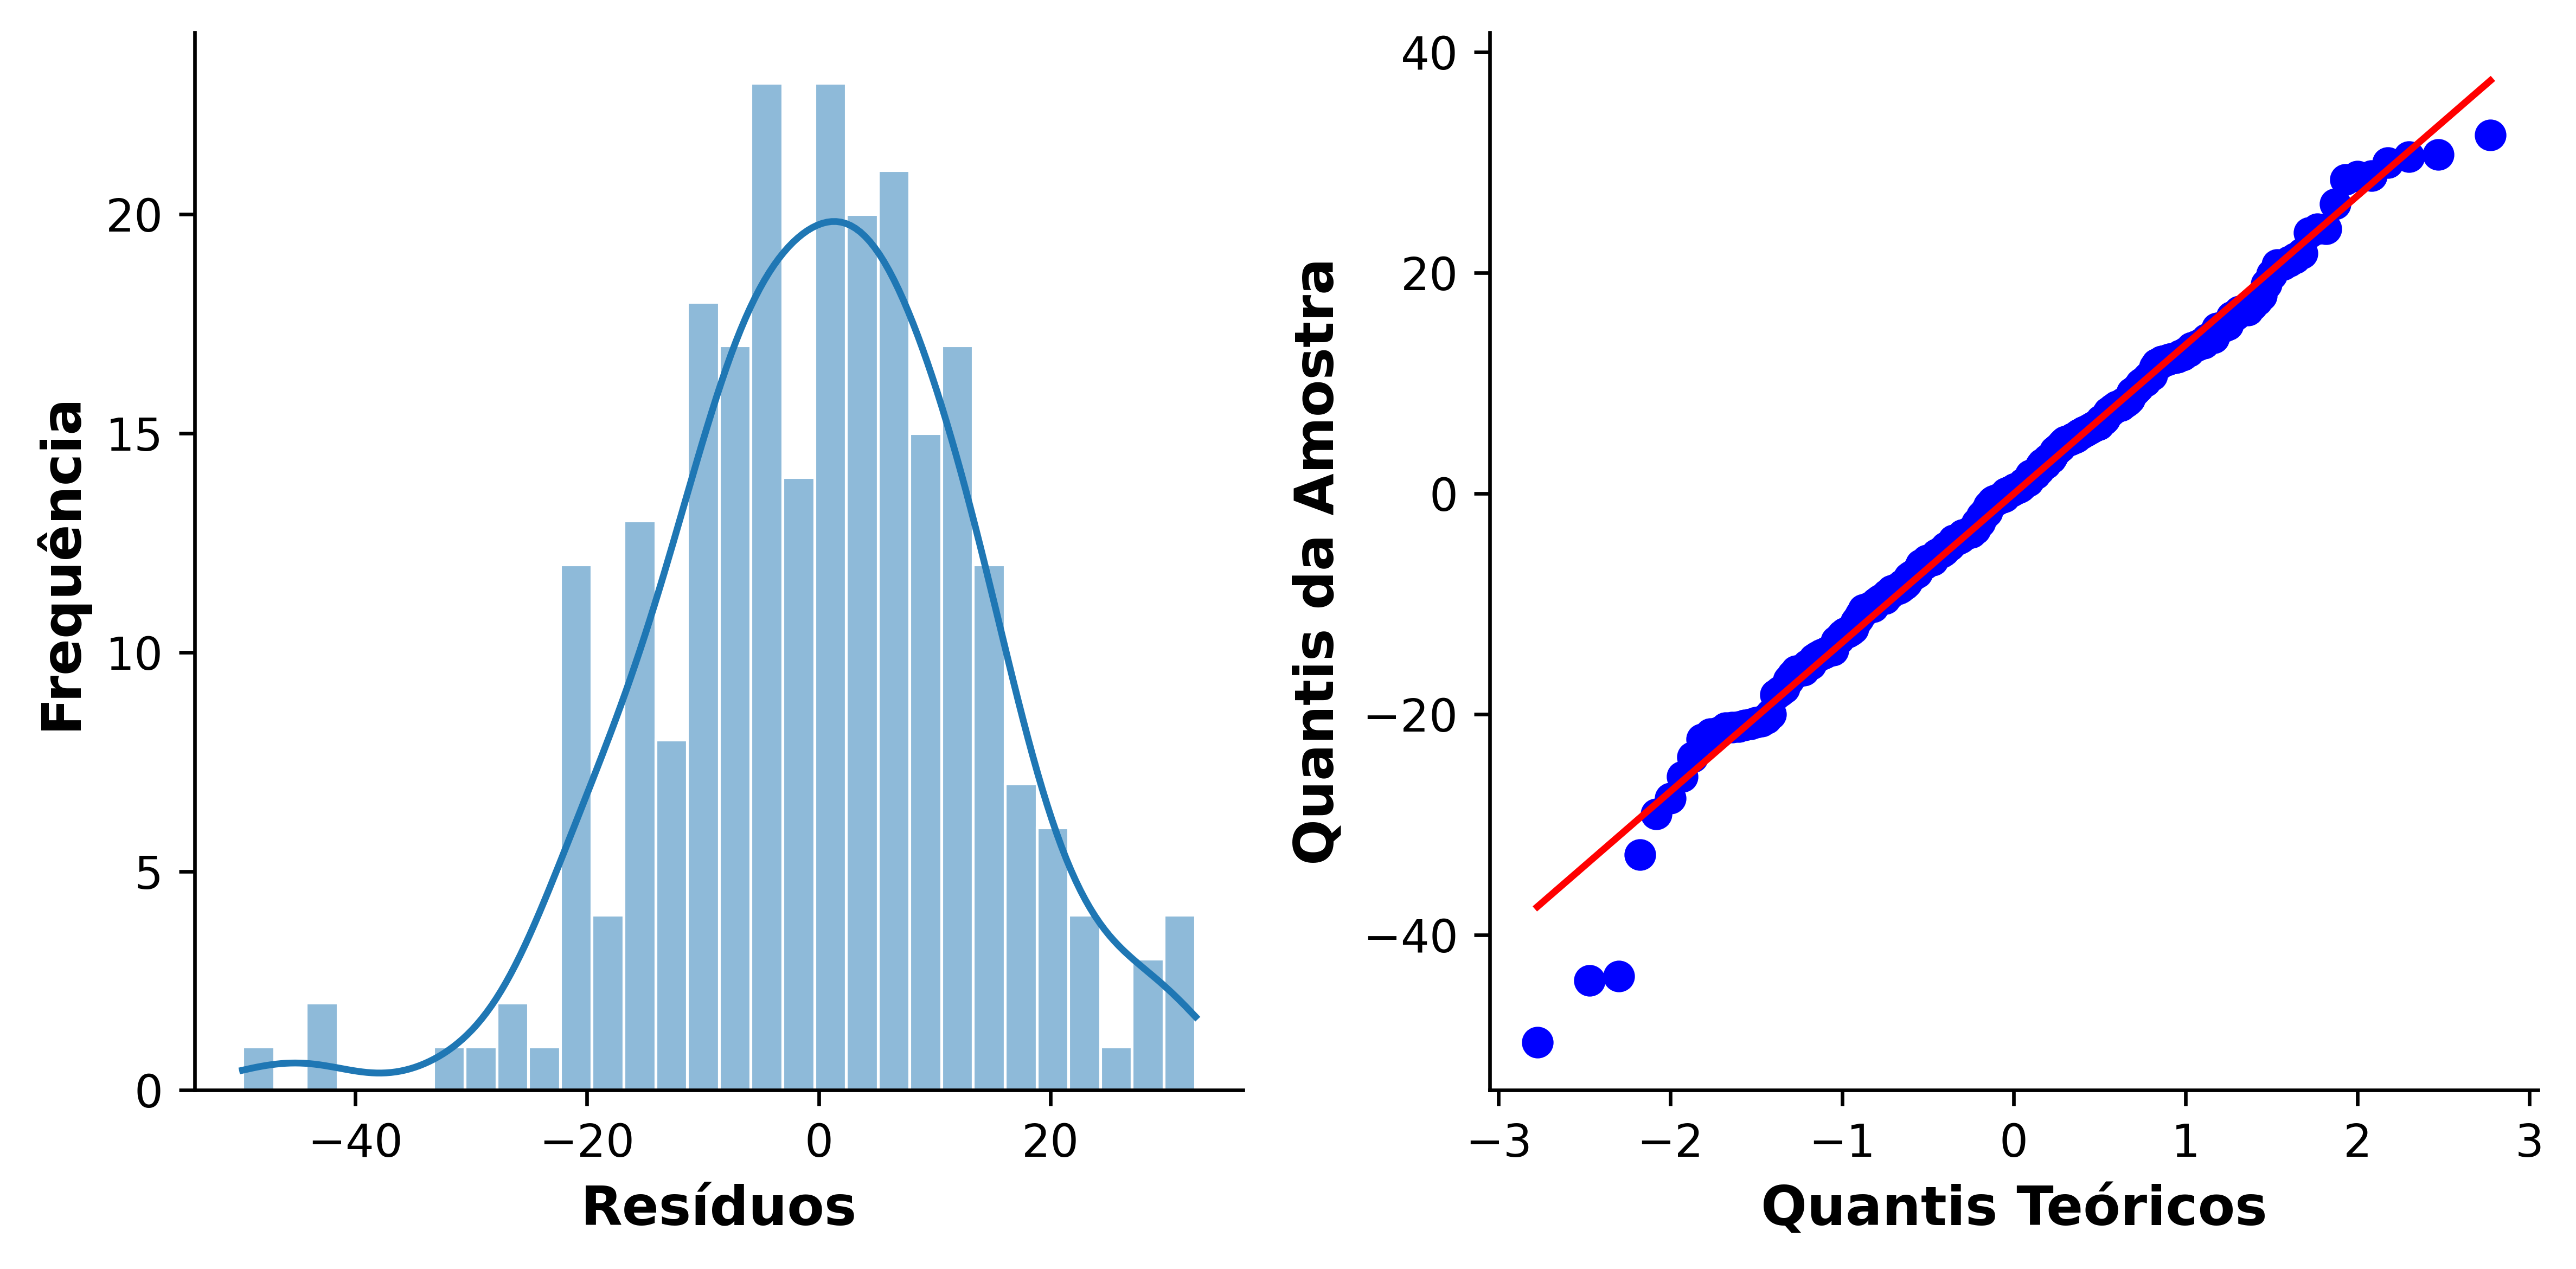

In [77]:
# Configurações da Figura
fig, axes = plt.subplots(1, 2, figsize=(8, 4), dpi=600)

# Histograma
sns.histplot(residuals, bins=30, edgecolor="white", kde=True, ax=axes[0])

# QQ Plot
probplot(residuals, dist="norm", plot=axes[1])

# Configurações de eixos
axes[0].set_xlabel("Resíduos", fontsize=12, weight="bold")
axes[0].set_ylabel("Frequência", fontsize=12, weight="bold")
axes[1].set_xlabel("Quantis Teóricos", fontsize=12, weight="bold")
axes[1].set_ylabel("Quantis da Amostra", fontsize=12, weight="bold")

# Configurações de títulos
axes[0].set_title("")
axes[1].set_title("")

# Outras configurações
for ax in axes:
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

# Ajuste do layout e Exibição da Figura
fig.tight_layout()
plt.show()

#### **(3.1.4.2) Verificação do Pressuposto de Homocedasticidade/Homogeneidade**

* Hipóteses: $$\begin{cases} H_{0}: \text{Os resíduos têm variância constante.} \\ H_{1}: \text{Os resíduos não têm variância constante.}\end{cases}$$

In [78]:
# Realiza o Teste de Breusch-Pagan
test_bp = het_breuschpagan(residuals, X)

# Realiza o Teste de White
test_white = het_white(residuals, X)

# Visualização dos Resultados
print(
    f"""
    Resultados dos Testes de Homocedasticidade/Homogeneidade:
    {"--" * 40}
    1. Teste Breusch-Pagan:
        - Estatística: {test_bp[0]:.4f}
        - P-valor: {test_bp[1]:.4f}
    {"--" * 40}
    2. Teste White:
        - Estatística: {test_white[0]:.4f}
        - P-valor: {test_white[1]:.4f}
    {"--" * 40}
    """
)


    Resultados dos Testes de Homocedasticidade/Homogeneidade:
    --------------------------------------------------------------------------------
    1. Teste Breusch-Pagan:
        - Estatística: 1.6826
        - P-valor: 0.4312
    --------------------------------------------------------------------------------
    2. Teste White:
        - Estatística: 2.7174
        - P-valor: 0.7435
    --------------------------------------------------------------------------------
    


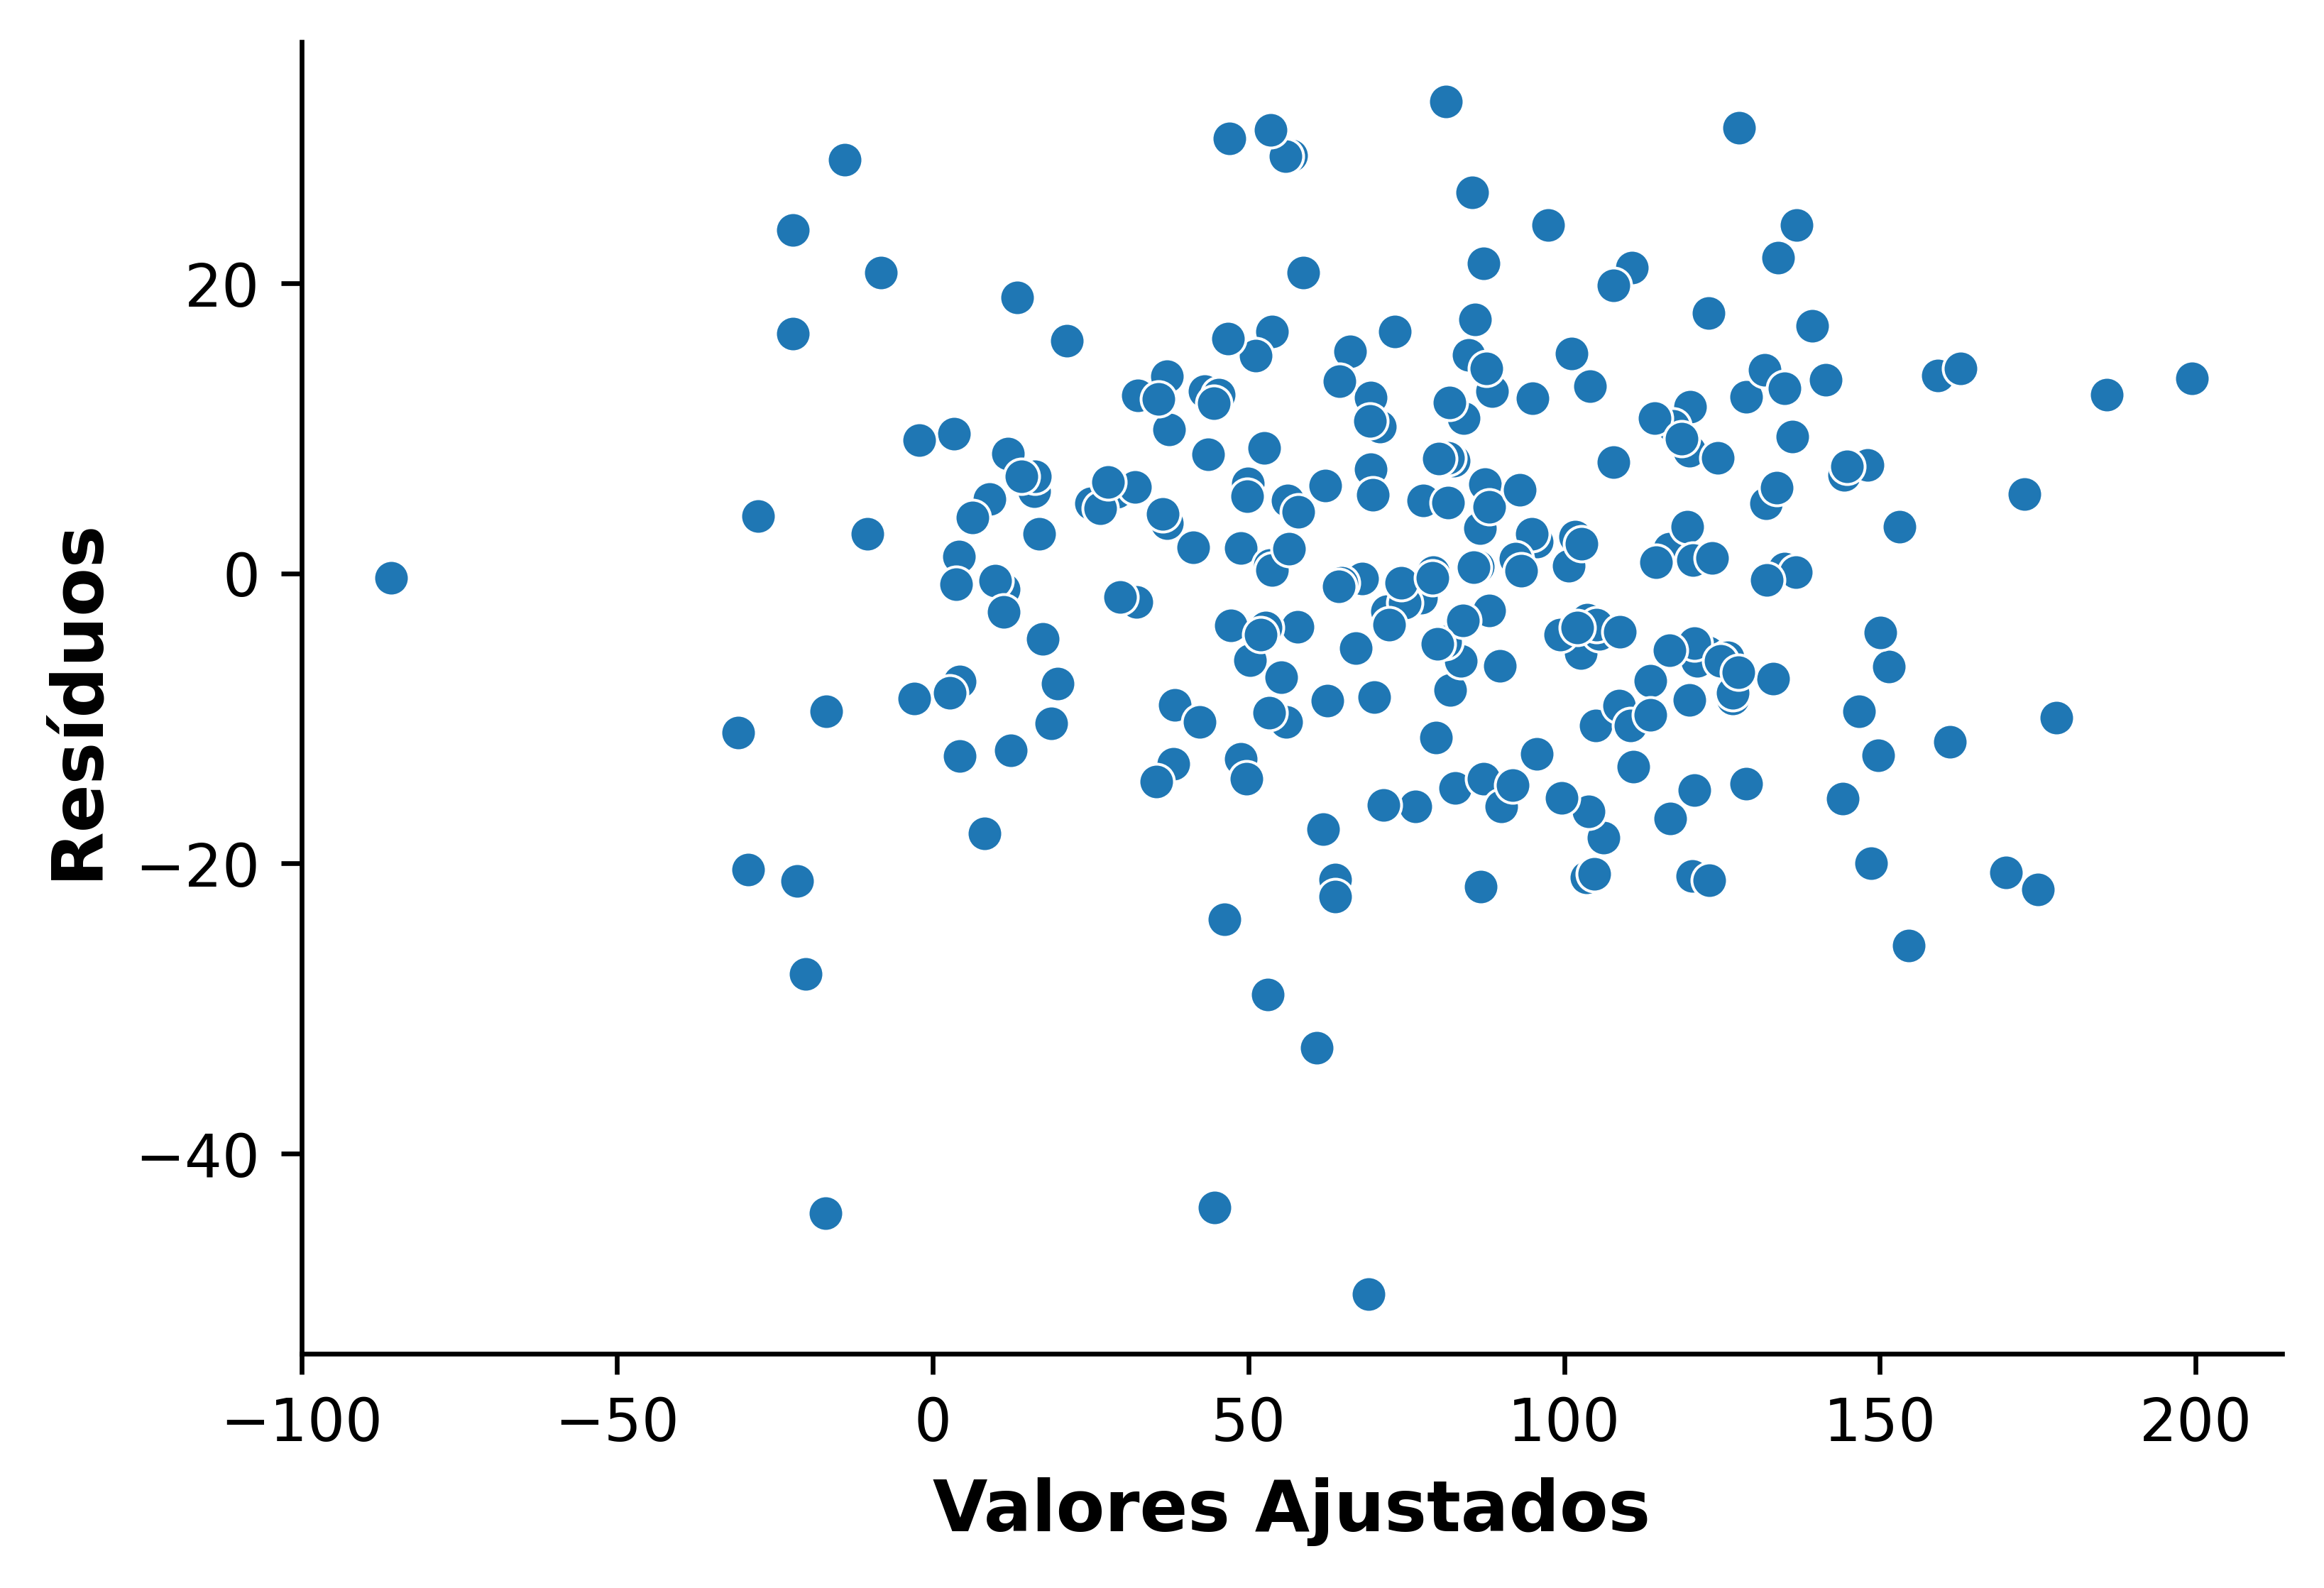

In [79]:
# Configurações da Figura
fig, ax = plt.subplots( figsize=(6, 4), dpi=600)

# Resíduos versus Valores Ajustados
sns.scatterplot(x=lm_model.fittedvalues, y=residuals, ax=ax)

# Configurações de eixos
ax.set_xlabel("Valores Ajustados", fontsize=12, weight="bold")
ax.set_ylabel("Resíduos", fontsize=12, weight="bold")

# Outras configurações
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Exibição da Figura
plt.show()

#### **(3.1.4.3) Verificação do Pressuposto de Independência**

* Hipóteses: $$\begin{cases} H_{0}: \text{Os resíduos são independentes.} \\ H_{1}: \text{Os resíduos não são independentes.}\end{cases}$$

In [43]:
# Realizando o Teste Durbin-Watson
test_dw = durbin_watson(residuals)

# Visualização dos Resultados
print(f"Teste Durbin-Watson para Autocorrelação: {test_dw:.2f}")

Teste Durbin-Watson para Autocorrelação: 1.98


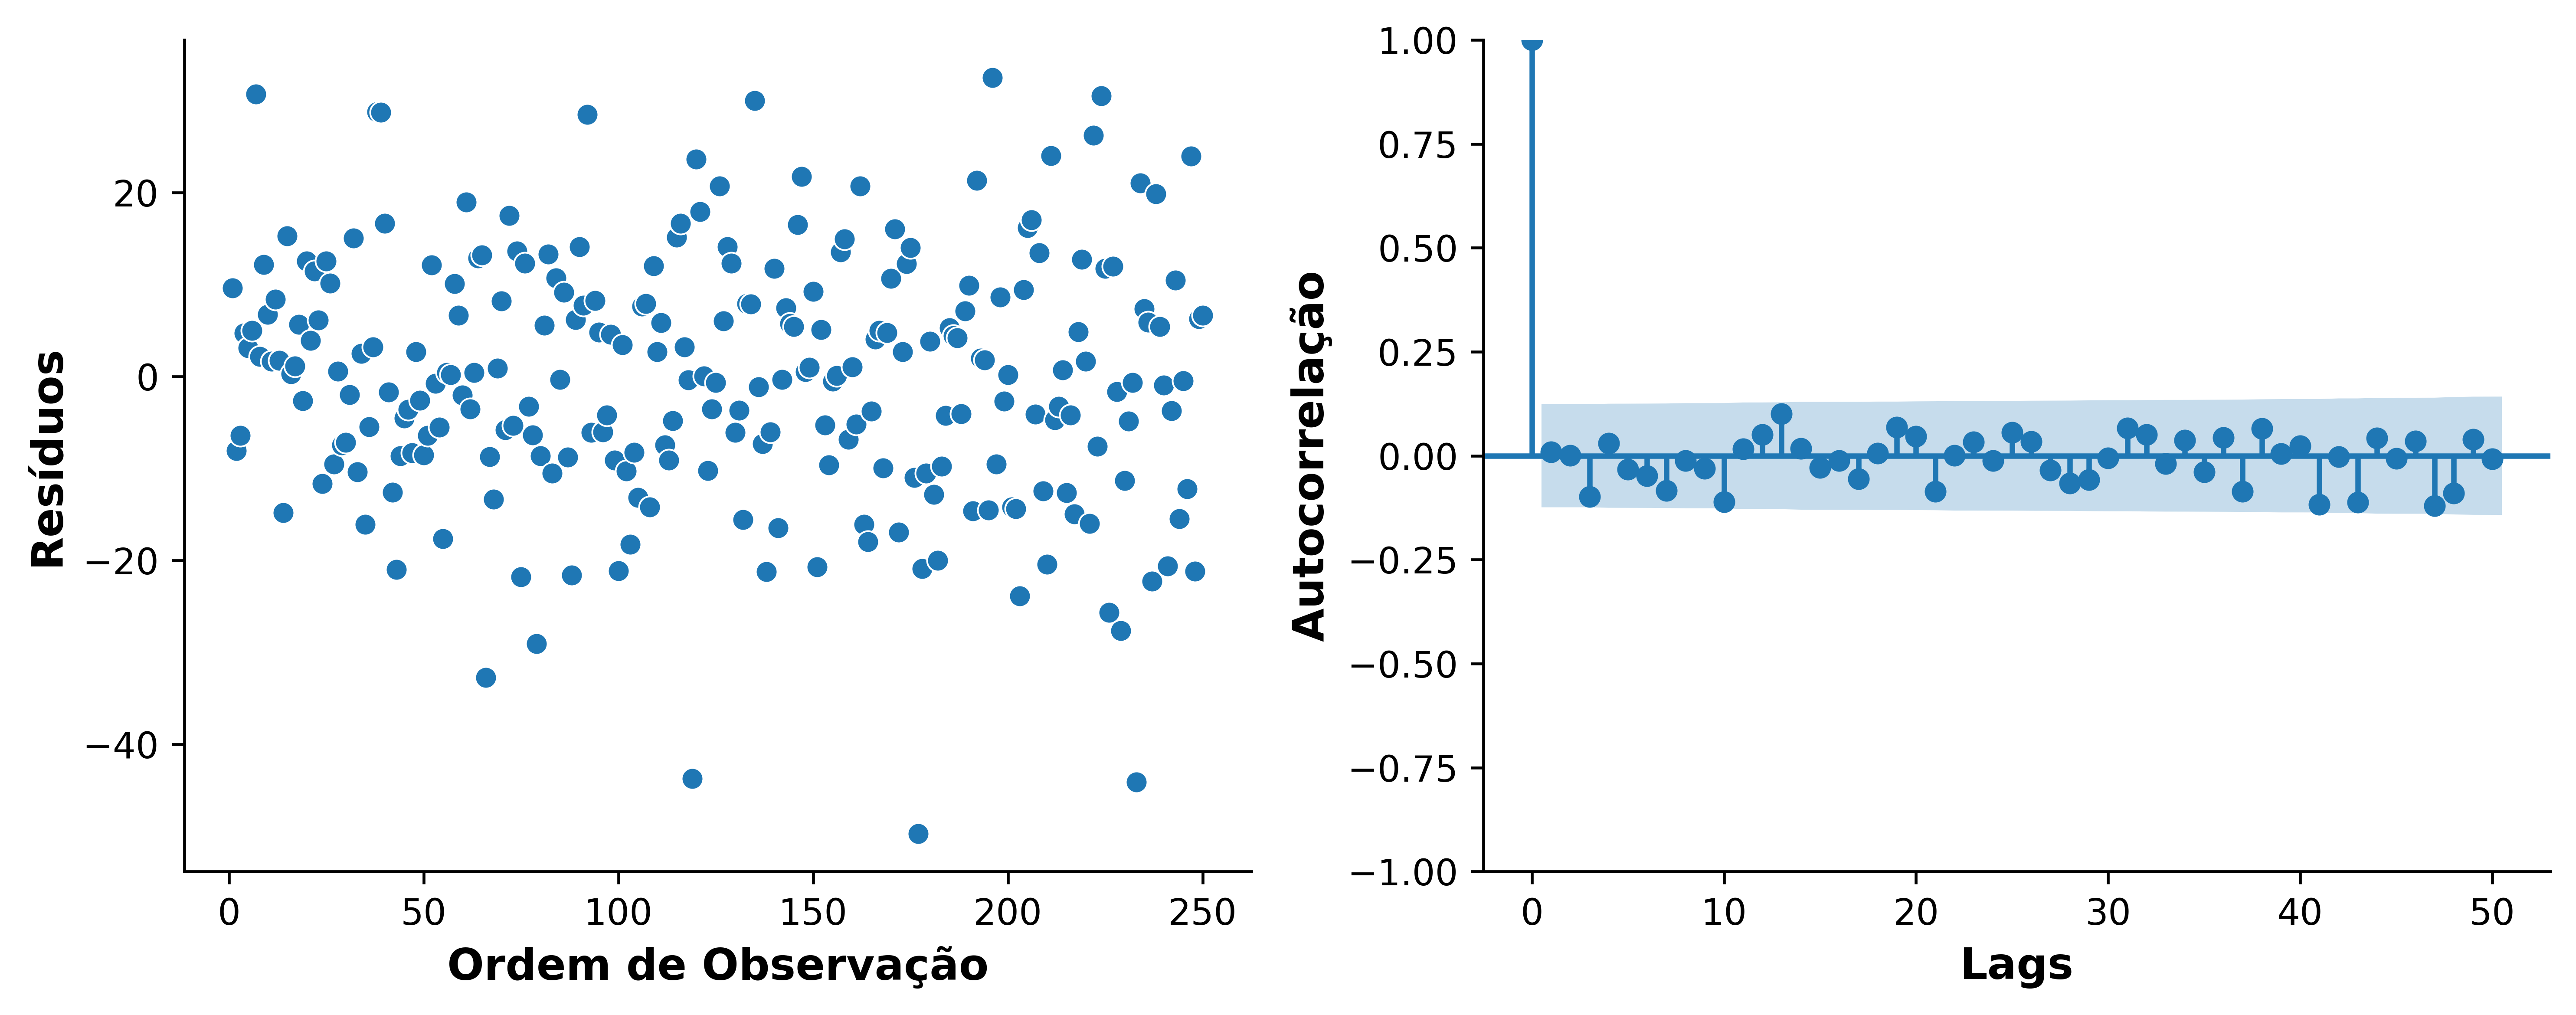

In [80]:
# Ordem de Observação
idx = np.arange(1, len(residuals) + 1)

# Configurações da Figura
fig, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=600)

# Resíduos versus Ordem de Observação
sns.scatterplot(x=idx, y=residuals, ax=axes[0])

# Autocorrelação
plot_acf(residuals, lags=50, ax=axes[1])

# Configurações de eixos
axes[0].set_xlabel("Ordem de Observação", fontsize=12, weight="bold")
axes[0].set_ylabel("Resíduos", fontsize=12, weight="bold")
axes[1].set_xlabel("Lags", fontsize=12, weight="bold")
axes[1].set_ylabel("Autocorrelação", fontsize=12, weight="bold")

# Outras configurações
for ax in axes:
    ax.set_title("")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

# Ajuste do layout e Exibição da Figura
fig.tight_layout()
plt.show()

#### **(3.1.4.4) Influência e Outliers**

* Técnicas Gráficas

In [166]:
# Diagonal da Matriz de Projeção
h_ii = lm_model.get_influence().summary_frame()["hat_diag"]

# Distância de Cook
d_cook = lm_model.get_influence().summary_frame()["cooks_d"]

# DFFITS
dffits = lm_model.get_influence().summary_frame()["dffits"]

# Diagnósticos
threshold = 2 * k / n                        # de Alavanca
threshold_f = 1                              # Distância de Cook
threshold_dffits = 2 * (k / (n - k)) ** 0.5  # DFFITS

# Formatação dos Resultados
influence_df = pd.DataFrame(
    {
      "Leverage": h_ii, "Leverage Info": np.where(h_ii >= threshold, "Influente", "Não Influente"),
      "Distância de Cook": d_cook, "Distância de Cook Info": np.where(d_cook >= threshold_f, "Influente", "Não Influente"),
      "DFFITS": dffits, "DFFITS Info": np.where(dffits >= threshold_dffits, "Influente", "Não Influente"),
      "Observação": np.arange(1, n + 1, dtype=int)
    }
).set_index("Observação")

# Visualizar
influence_df

Leverage  Leverage Info  Distância de Cook Distância de Cook Info  \
Observação                                                                      
1           0.020090  Não Influente           0.003529          Não Influente   
2           0.014702  Não Influente           0.001788          Não Influente   
3           0.008208  Não Influente           0.000619          Não Influente   
4           0.017059  Não Influente           0.000717          Não Influente   
5           0.012415  Não Influente           0.000227          Não Influente   
...              ...            ...                ...                    ...   
246         0.017386  Não Influente           0.004877          Não Influente   
247         0.005751  Não Influente           0.006094          Não Influente   
248         0.026774      Influente           0.022992          Não Influente   
249         0.009800  Não Influente           0.000717          Não Influente   
250         0.015400  Não Influente           0.001286          Não Influente   

              DFFITS    DFFITS Info  
Observação                           
1           0.102789  Não Influente  
2          -0.073135  Não Influente  
3          -0.043029  Não Influente  
4           0.046311  Não Influente  
5           0.026051  Não Influente  
...              ...            ...  
246        -0.120914  Não Influente  
247         0.135813  Não Influente  
248        -0.263440  Não Influente  
249         0.046301  Não Influente  
250         0.062016  Não Influente  

[250 rows x 6 columns]

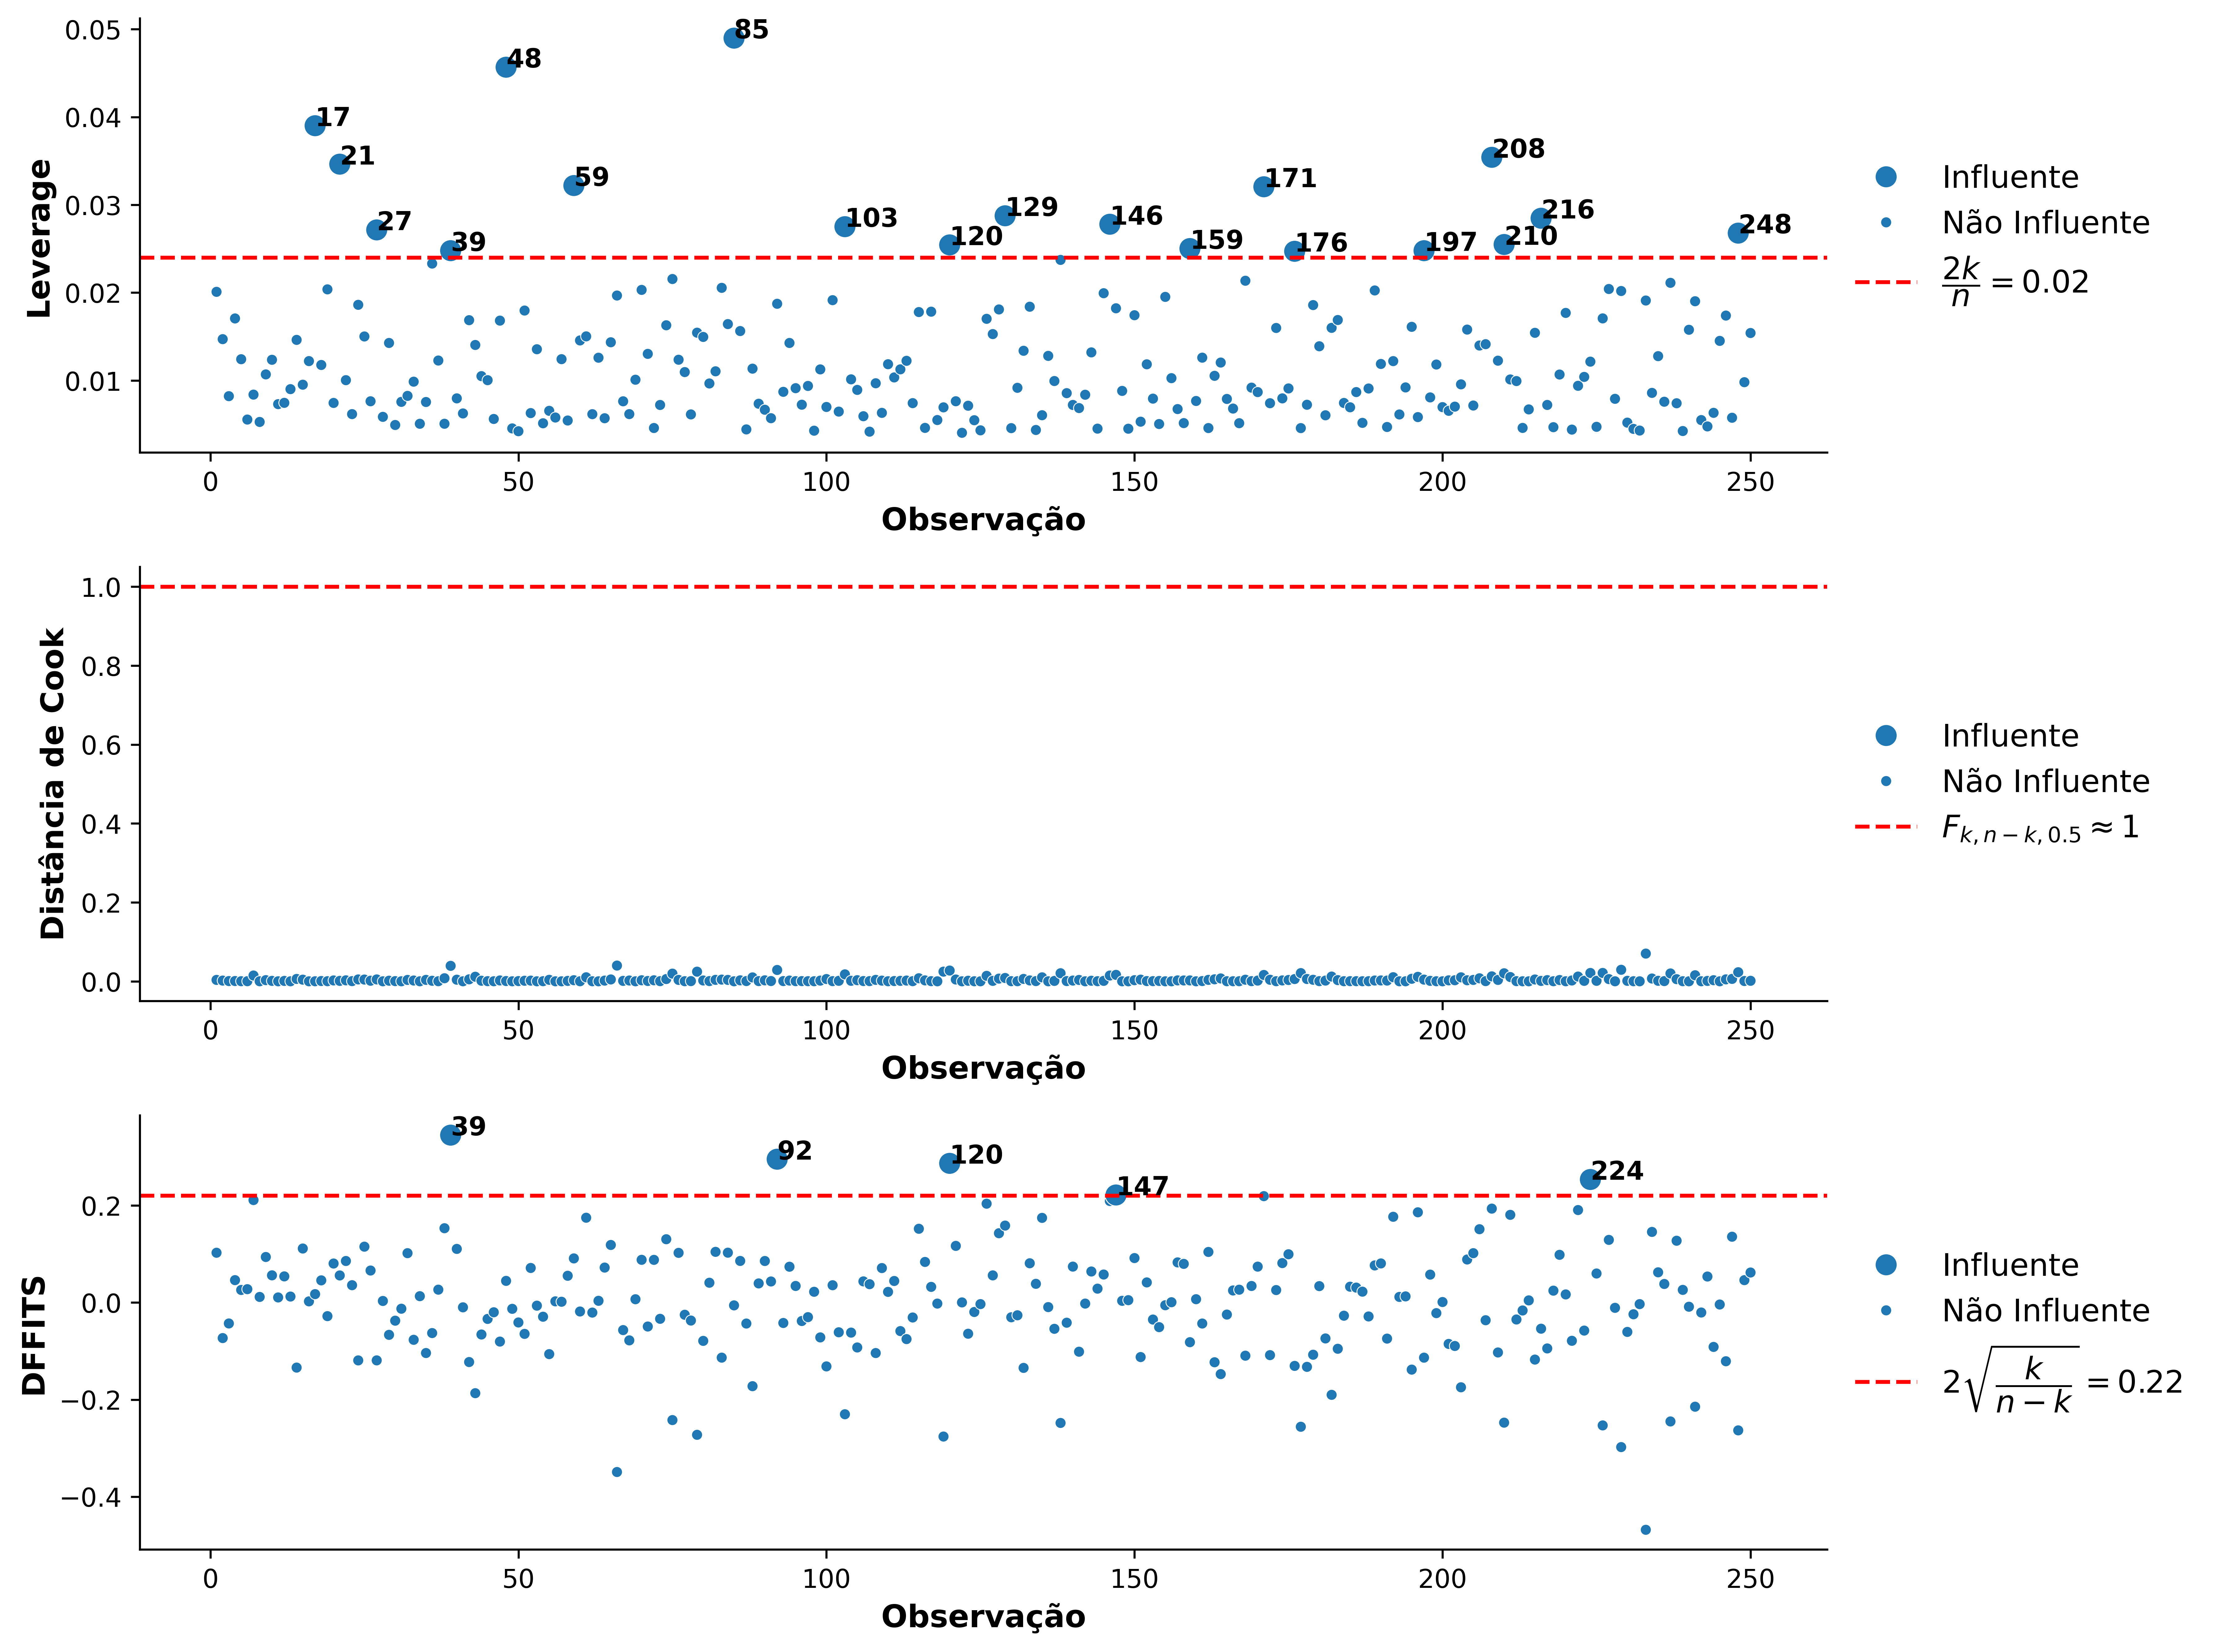

In [180]:
# Configurações da Figura
fig, axes = plt.subplots(3, 1, figsize=(12, 9), dpi=600)

# Reajustando o formato do vetor dos eixos
axes = axes.flatten()

# Leverage (Alavancagem)
sns.scatterplot(x=influence_df.index, y=influence_df["Leverage"],
                size=influence_df["Leverage Info"], size_order=["Influente", "Não Influente"],
                ax=axes[0])

# Threshold
axes[0].axhline(threshold, color="red", linestyle="--", label=r"$\dfrac{2k}{n} =$"+f"{threshold:.2f}")

# Anotar a observação influente no plot
for idx, row in influence_df.iterrows():
    if row["Leverage"] >= threshold:
      axes[0].annotate(f"{idx}", (idx, row["Leverage"]), fontsize=10, weight="bold")

# Distância de Cook
sns.scatterplot(x=influence_df.index, y=influence_df["Distância de Cook"],
                size=influence_df["Distância de Cook Info"], size_order=["Influente", "Não Influente"],
                ax=axes[1])

# Threshold
axes[1].axhline(threshold_f, color="red", linestyle="--", label=r"$F_{k, n-k, 0.5} \approx$"+f"{threshold_f}")

# Anotar a observação influente no plot
for idx, row in influence_df.iterrows():
    if row["Distância de Cook"] >= threshold_f:
      axes[1].annotate(f"{idx}", (idx, row["Distância de Cook"]), fontsize=10, weight="bold")

# DFFITS
sns.scatterplot(x=influence_df.index, y=influence_df["DFFITS"],
                size=influence_df["DFFITS Info"], size_order=["Influente", "Não Influente"],
                ax=axes[2])

# Threshold
axes[2].axhline(threshold_dffits, color="red", linestyle="--", label=r"$2 \sqrt{\dfrac{k}{n - k}} =$"+f"{threshold_dffits:.2f}")

# Anotar a observação influente no plot
for idx, row in influence_df.iterrows():
    if row["DFFITS"] >= threshold_dffits:
      axes[2].annotate(f"{idx}", (idx, row["DFFITS"]), fontsize=10, weight="bold")

# Iteração para configuração
for ax in axes:
  # Configurações de eixos
  ax.set_xlabel(ax.get_xlabel(), fontsize=12, weight="bold")
  ax.set_ylabel(ax.get_ylabel(), fontsize=12, weight="bold")

  # Configurações de Legenda
  ax.legend(prop={"size": 12}, loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)

  # Outras configurações
  ax.spines["top"].set_visible(False)
  ax.spines["right"].set_visible(False)

# Ajuste do layout e Exibição da Figura
fig.tight_layout()
plt.show()

In [83]:
# Resíduos Ordinários
# residuals

# Resíduos Padronizados (Standartized Residuals)
r_i = lm_model.get_influence().summary_frame()["standard_resid"]

# Resíduos Studentizados (Studentized Residuals)
t_i = lm_model.get_influence().summary_frame()["student_resid"]

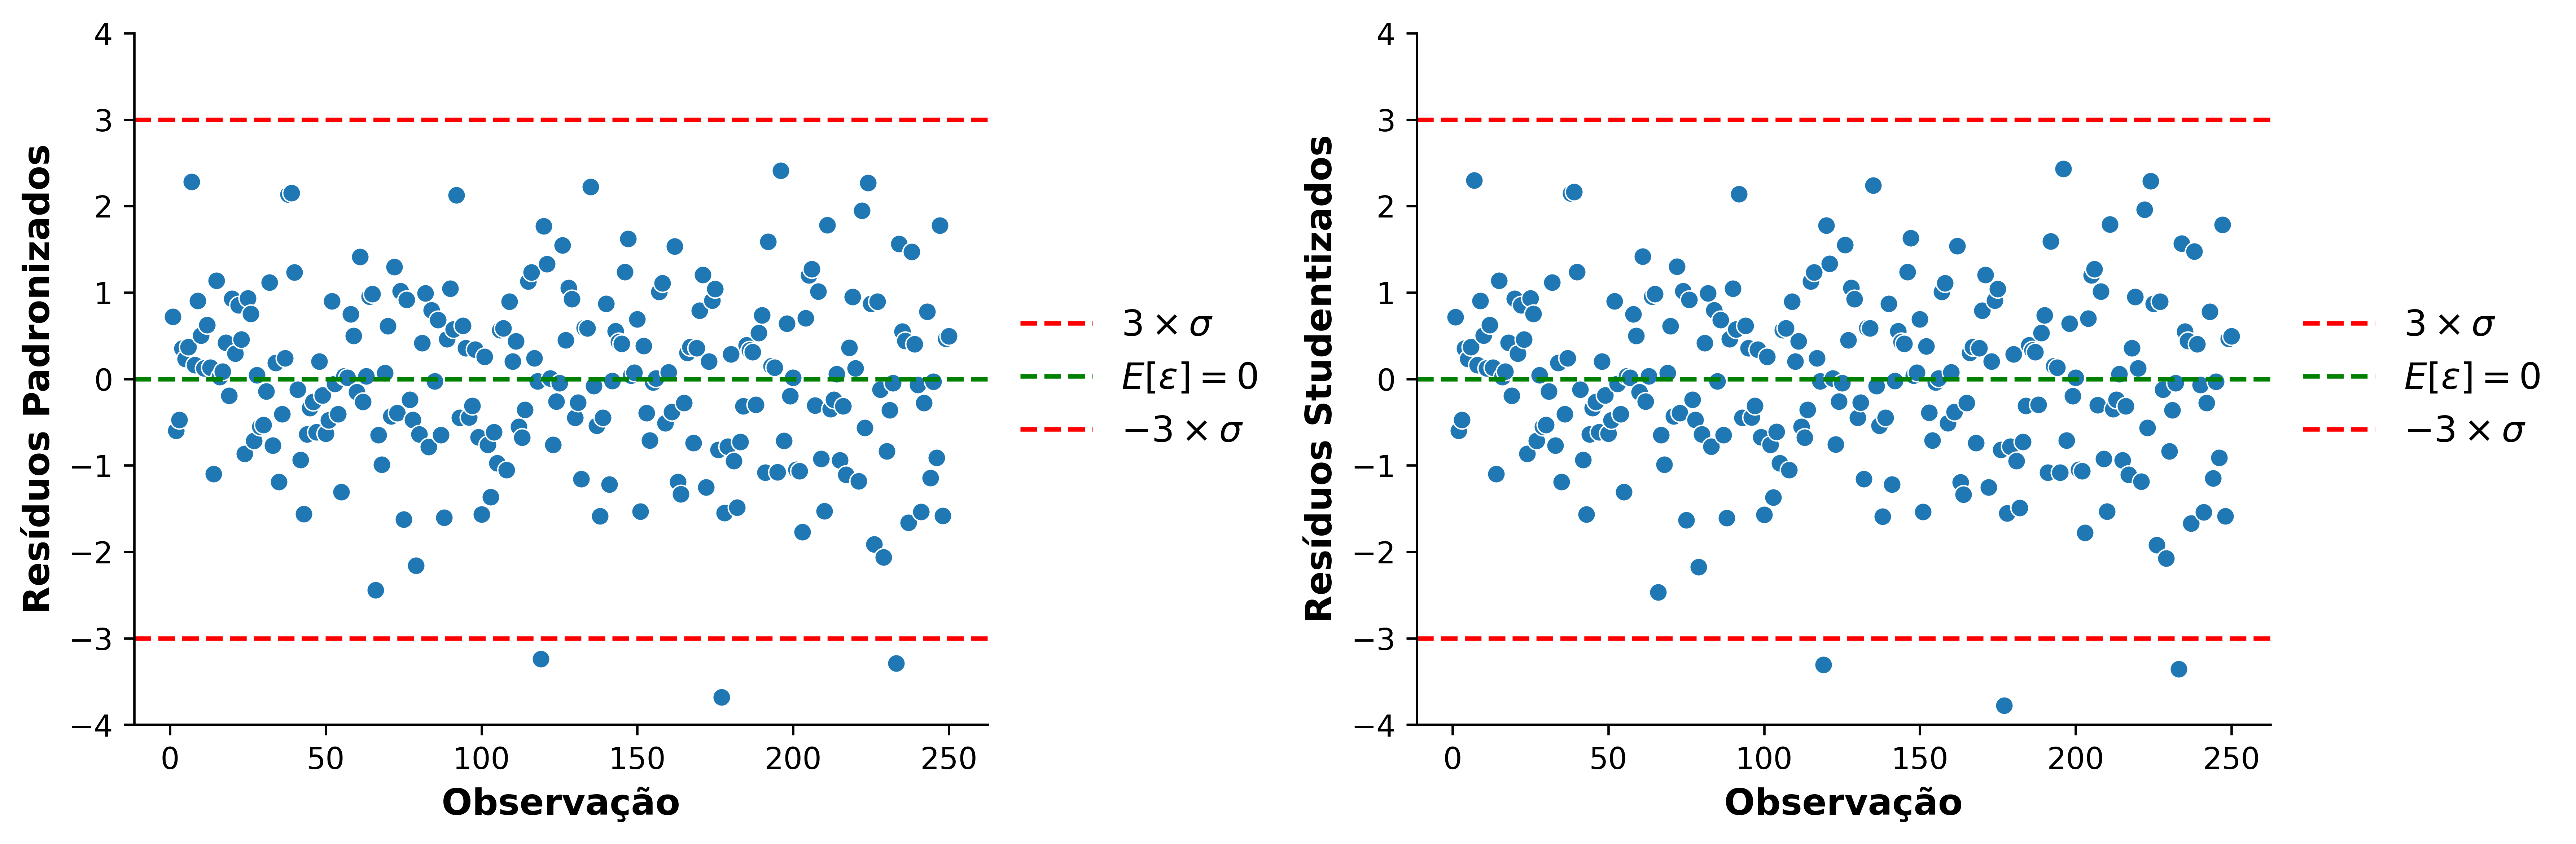

In [197]:
# Configurações da Figura
fig, axes = plt.subplots(1, 2, figsize=(12, 4), dpi=600)

# Identificação de Outiliers
sns.scatterplot(x=np.arange(1, n + 1, dtype=int), y=r_i, ax=axes[0])
axes[0].set_ylabel("Resíduos Padronizados", fontsize=12, weight="bold")

# Identificação de Outiliers
sns.scatterplot(x=np.arange(1, n + 1, dtype=int), y=t_i, ax=axes[1])
axes[1].set_ylabel("Resíduos Studentizados", fontsize=12, weight="bold")

# Iteração para Configurações
for ax in axes:
  # Configurações de eixos
  ax.set_xlabel("Observação", fontsize=12, weight="bold")
  ax.set_ylim(-4, 4)

  # Linhas de Referência
  ax.axhline(3, color="red", linestyle="--", label=r"$3 \times \sigma$")      # 3 x sigma
  ax.axhline(0, color="green", linestyle="--", label=r"$E[\varepsilon] = 0$") # mu
  ax.axhline(-3, color="red", linestyle="--", label=r"$-3 \times \sigma$")    # -3 x sigma

  # Configurações de Legenda
  ax.legend(prop={"size": 12}, loc="center left", bbox_to_anchor=(1, 0.5), frameon=False)

  # Outras configurações
  ax.spines["top"].set_visible(False)
  ax.spines["right"].set_visible(False)

# Ajuste do layout e Exibição da Figura
fig.tight_layout()
plt.show()